In [1]:
import cv2
import matplotlib.pyplot as plt
from immas import MammogramImage , preprocessing , segmentation
from immas.io import read_dataset
from immas.basic_functions import show_image_plt
from immas import preprocessing

#Openkernel , Openkernel1 and Openkernel2 are tuples
def Segmentation(img,Openkernel= (10,10), Openkernel1= (13,13)):
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img1 = preprocessing.open(img,Openkernel)
    img2 = preprocessing.open(img,Openkernel1)
    return (img1,img2)

#mean 1&2 are numbers
def Segmentation2(img, mean1=30,mean2=30, OpenKerne2=(20,20)):
    img = segmentation.mean_shift(img,mean1,mean2)
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img = preprocessing.open(img,OpenKerne2)
    return img

from immas import preprocessing

def testPreProcessing (img, kernel_size = 10, clahe_kernel = 20):
    #img = preprocessing.resize(img, 0.5, 0.5)
    #img = preprocessing.open(img)
    #img = preprocessing.close(img)
    #img = preprocessing.erode(img)
    #img = preprocessing.dilate(img)
    #img = preprocessing.clahe(img,10)
    img = preprocessing.morphoEnhancement(img,kernel_size, clahe_kernel)
    img = preprocessing.waveletTransform(img)
    return img

In [2]:
data_set = read_dataset(image_folder="../dataset/masses_examples",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks", train_set_fraction=1)

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

img = data_set["train"]

def Plot_Result(img, Morpho_kernel_size, Morpho_clahe_kernel, Openkernel, Openkernel1, Openkernel2, mean1, mean2):

    for m in img:
        m.read_data()
        m.image_data = testPreProcessing(m.image_data, Morpho_kernel_size, Morpho_clahe_kernel )

        #segment using both methods
        result1, result2 = Segmentation(m.image_data,Openkernel, Openkernel1)
        result3 = Segmentation2(m.image_data, mean1,mean2, Openkernel2)

        #show both results
        plt.figure(figsize=(20, 40))
        plt.subplot(1,4,1)
        plt.axis("off")
        plt.imshow(m.cropped_ground_truth, interpolation="nearest", cmap=plt.cm.gray)
        plt.title('Groundtruth')

        plt.subplot(1,4,2)
        plt.axis("off")
        plt.imshow(result1, interpolation="nearest", cmap=plt.cm.gray)
        print(m.cropped_ground_truth.shape)
        print(result1.shape)
        if (result1.shape == (m.cropped_ground_truth).shape):
            print(segmentation.jaccard_index(result1,  m.cropped_ground_truth))        
        plt.title('Segmentation1')

        plt.subplot(1,4,3)
        plt.axis("off")
        plt.imshow(result2, interpolation="nearest", cmap=plt.cm.gray)
        print(result2.shape)
        if (result2.shape == (m.cropped_ground_truth).shape):
            print(segmentation.jaccard_index(result2,  m.cropped_ground_truth))        
        plt.title('Segmentation2')

        plt.subplot(1,4,4)
        plt.axis("off")
        plt.imshow(result3, interpolation="nearest", cmap=plt.cm.gray)
        print(result3.shape)        
        if (result3.shape == (m.cropped_ground_truth).shape):
            print(segmentation.jaccard_index(result3,  m.cropped_ground_truth))                
        plt.title('Segmentation3')
        plt.show()

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 107, number of images for testing is 0


/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars


(2964, 1820)
(2964, 1820)
0.7198759272341929
(2964, 1820)
0.6776869723574311
(2964, 1820)
0.7195499005781409


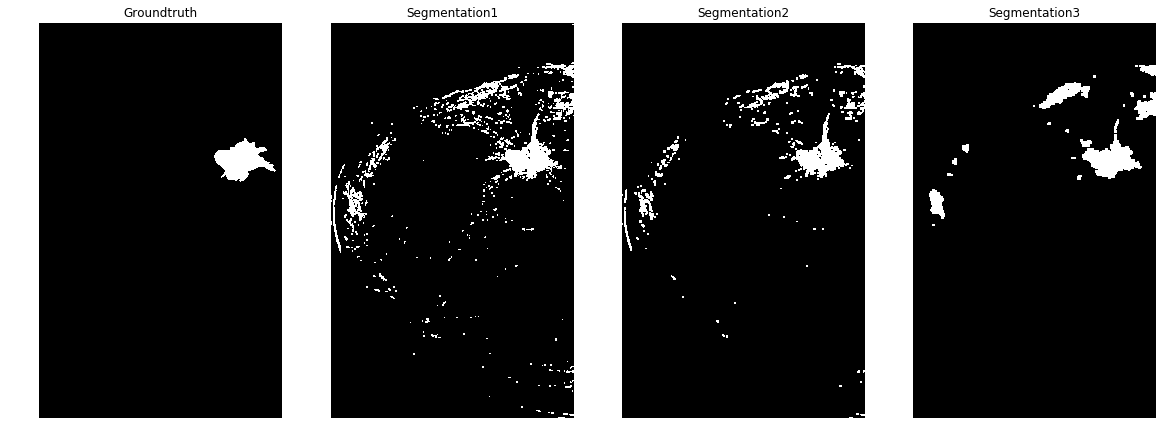

(2808, 1032)
(2808, 1032)
0.07320704360462356
(2808, 1032)
0.04557683403184252
(2808, 1032)
0.5416150821104759


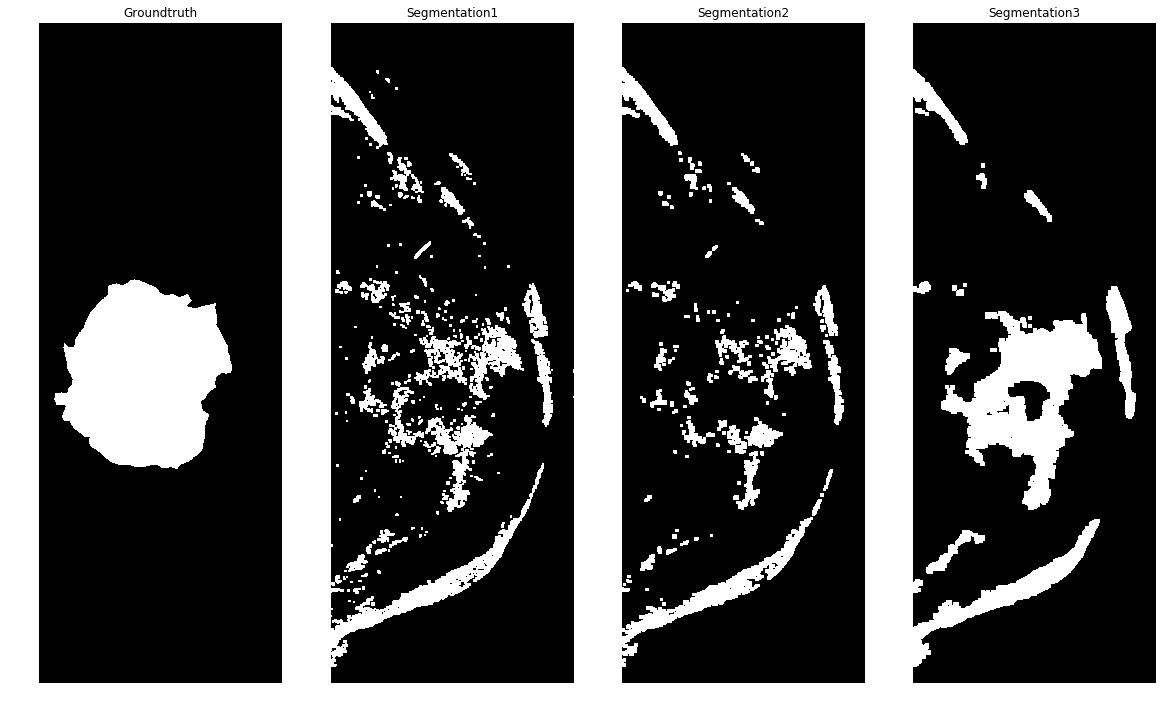

(2984, 1186)
(2984, 1186)
0.09760315266300032
(2984, 1186)
0.06571184895450402
(2984, 1186)
0.21483398523659678


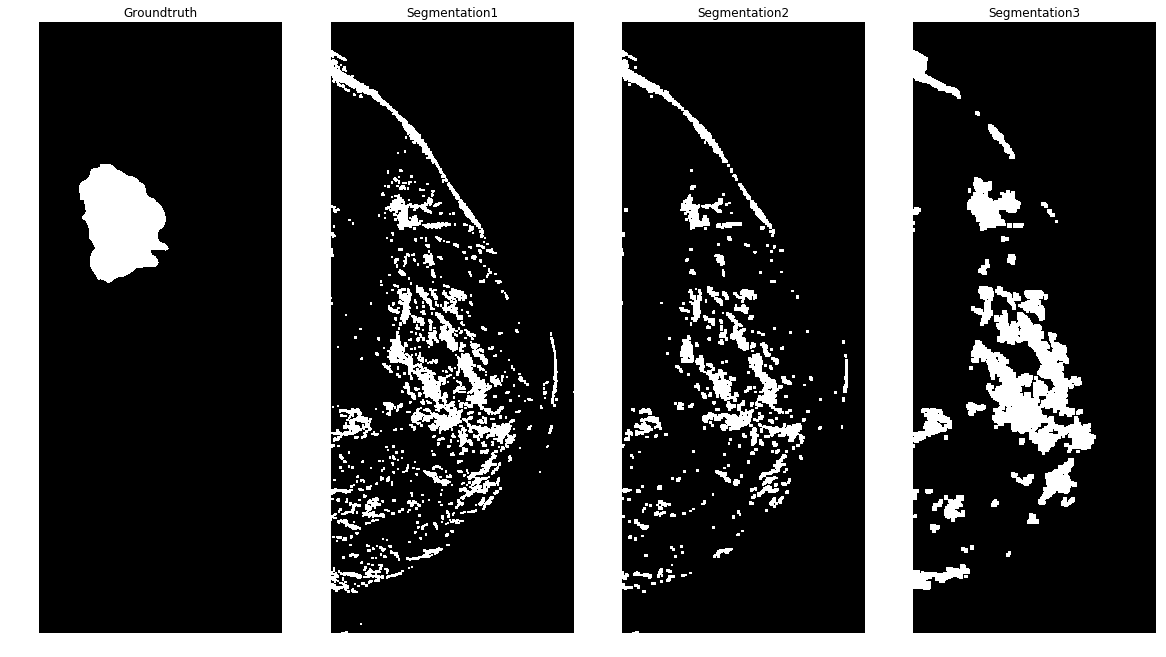

(2770, 1173)
(2770, 1173)
0.5861763231949424
(2770, 1173)
0.5086471623687828
(2770, 1173)
0.27363552349420833


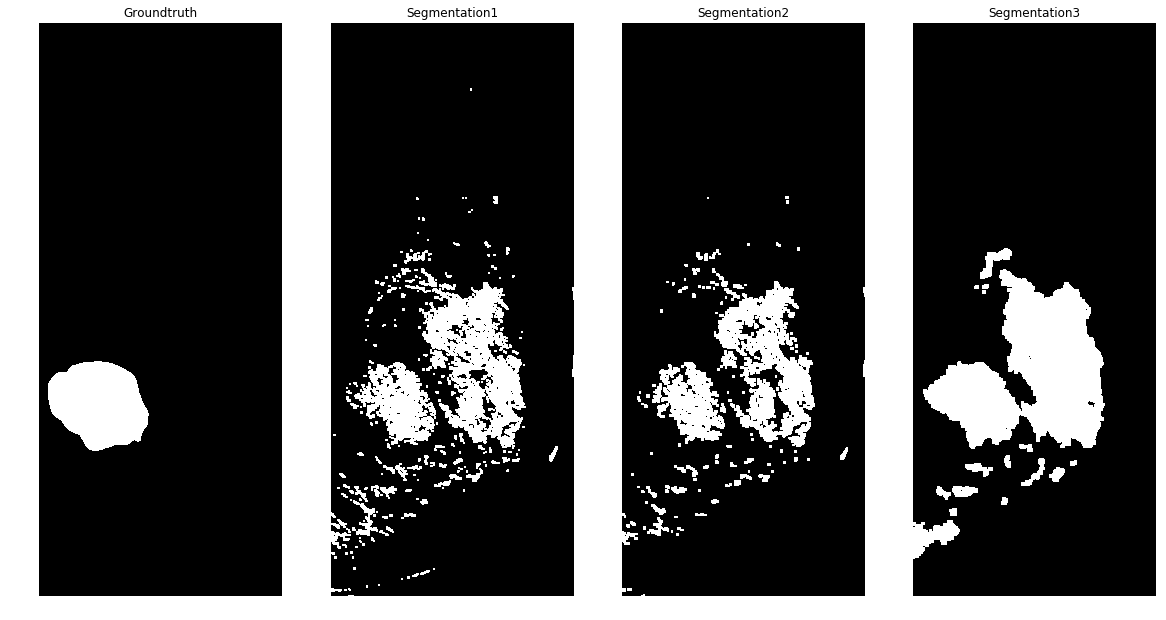

(3649, 1905)
(3649, 1905)
0.6382218753751951
(3649, 1905)
0.6575703052112488
(3649, 1905)
0.008426759228626743


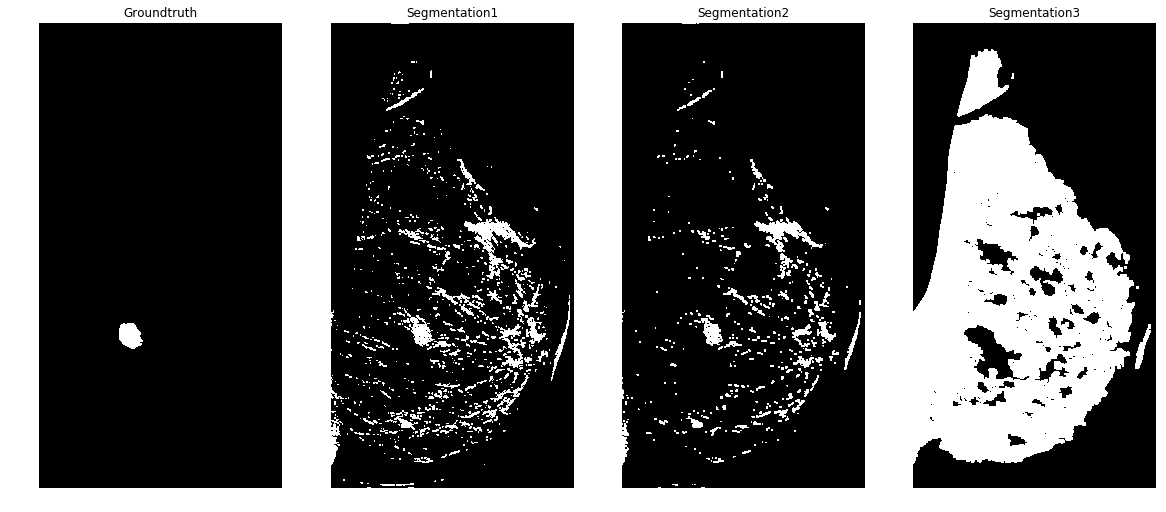

(3133, 1658)
(3133, 1658)
0.07236363263590606
(3133, 1658)
0.32521967952633807
(3133, 1658)
0.3417378407405513


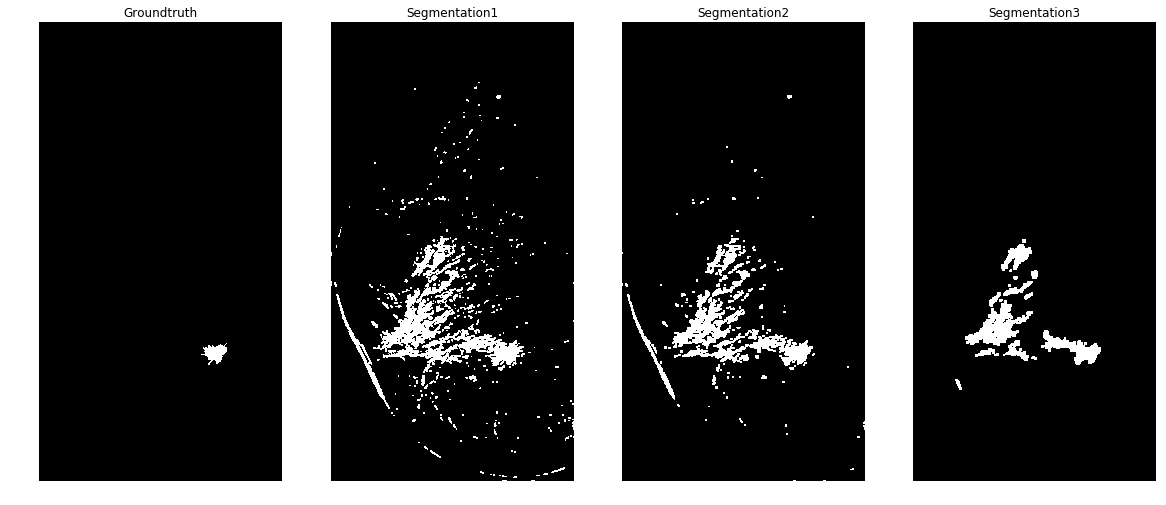

(4072, 2476)
(4072, 2476)
0.7653916041559894
(4072, 2476)
0.7264179104477612
(4072, 2476)
0.6875682435396115


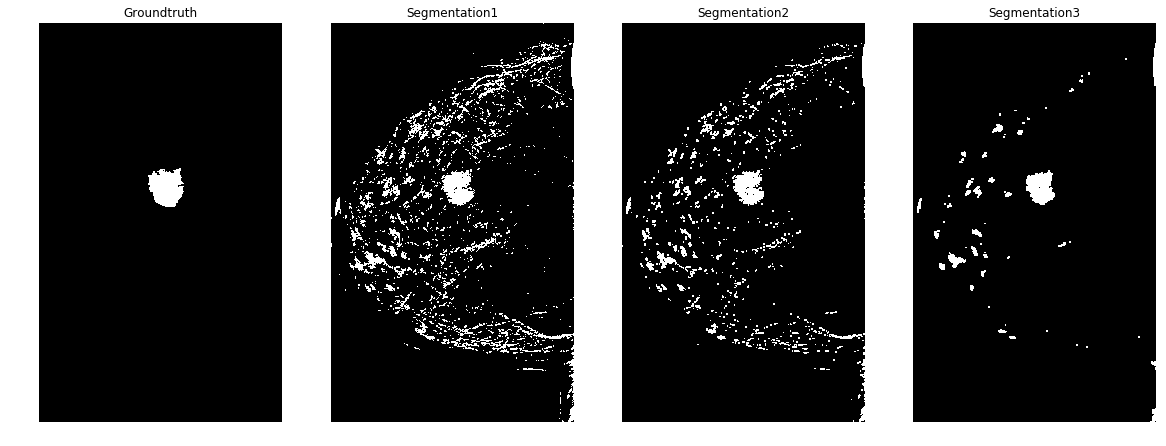

(4072, 1730)
(4072, 1730)
0.4048697776602824
(4072, 1730)
0.2225838803792852
(4072, 1730)
0.03463577489020005


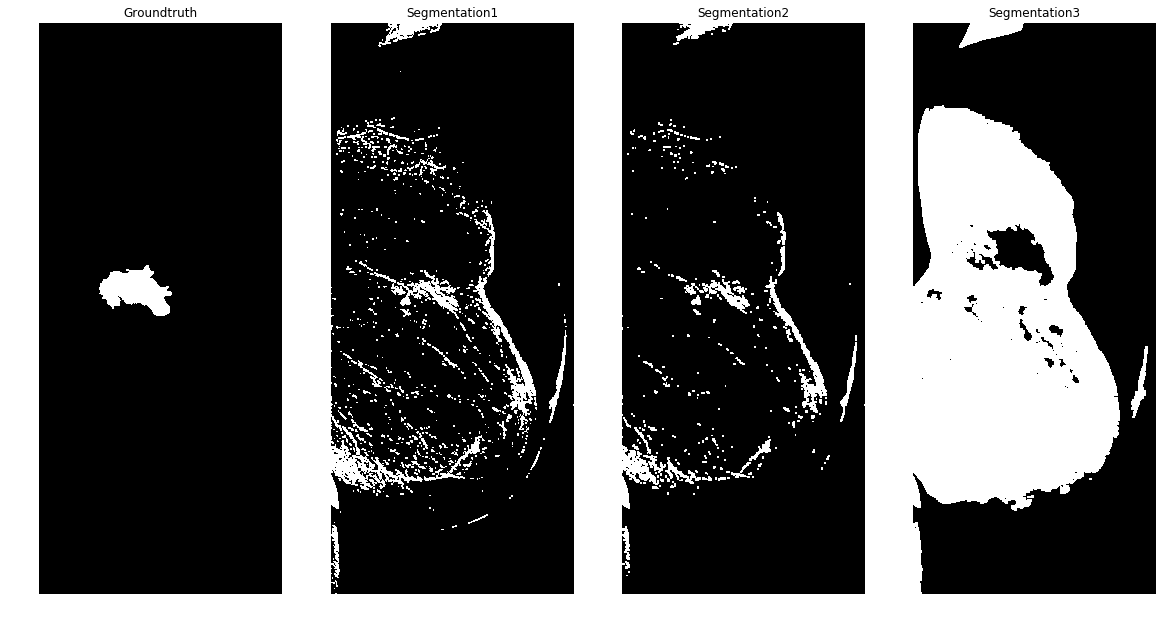

(3449, 1876)
(3449, 1876)
0.3445535866624418
(3449, 1876)
0.22951796873081398
(3449, 1876)
0.24615118018313817


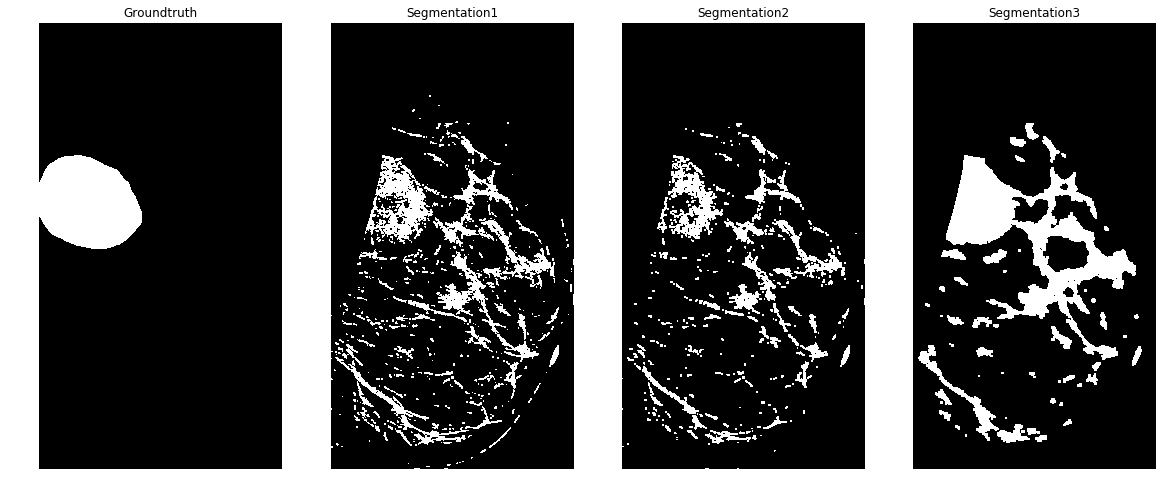

(3205, 2231)
(3205, 2231)
0.5085500117123448
(3205, 2231)
0.4209970674486804
(3205, 2231)
0.5420879379261697


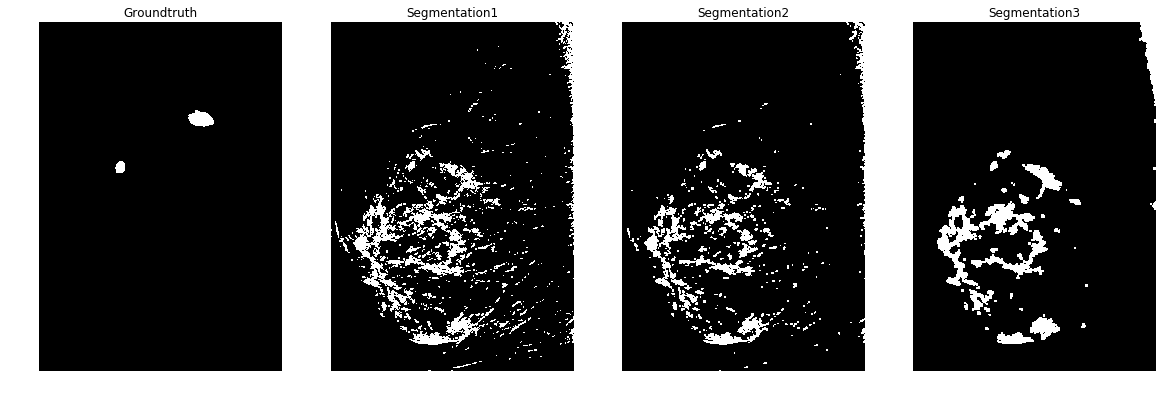

(3201, 1722)
(3201, 1722)
0.5793792897642495
(3201, 1722)
0.6409175240344072
(3201, 1722)
0.01904573319809098


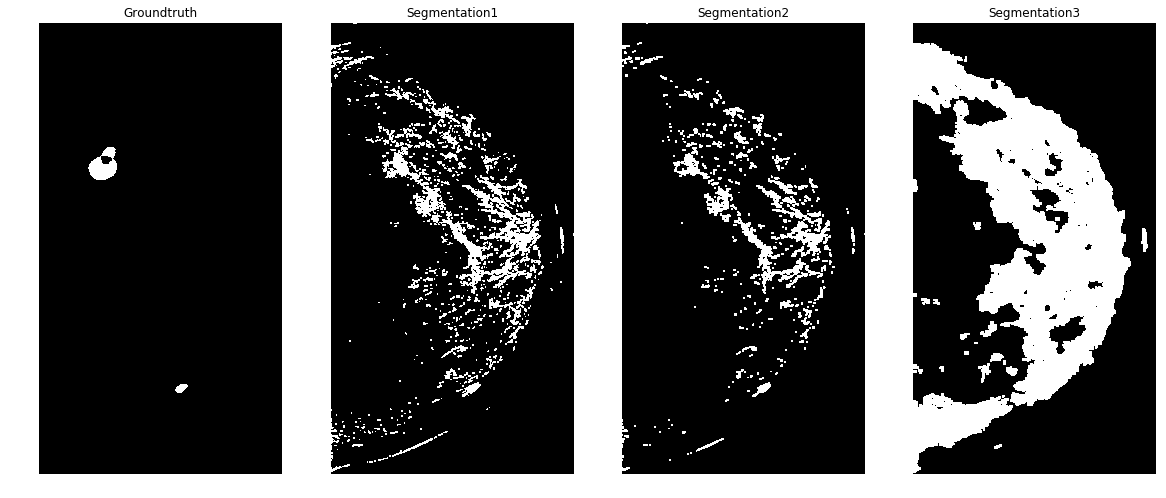

(2920, 1802)
(2920, 1802)
0.8487316840358163
(2920, 1802)
0.8322467011441349
(2920, 1802)
0.6127311013467864


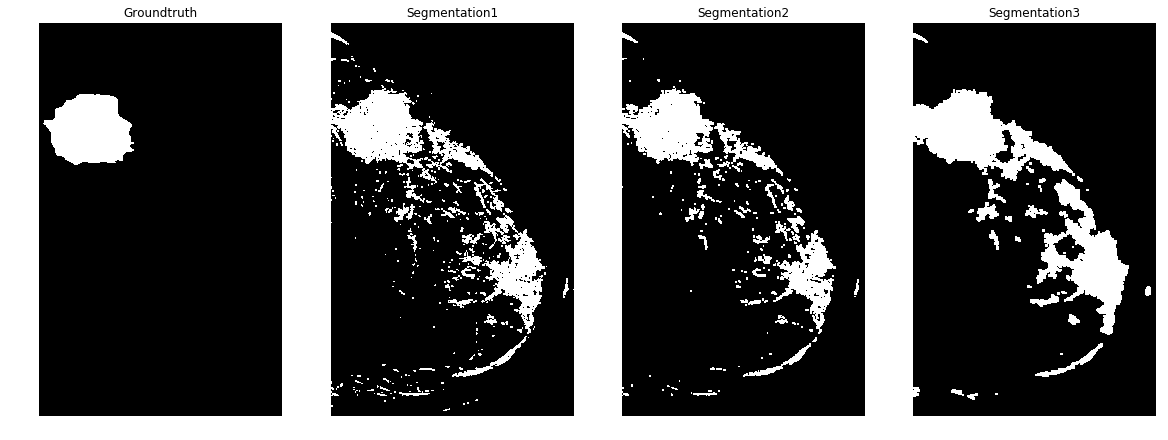

(2782, 1274)
(2782, 1274)
0.819089194050805
(2782, 1274)
0.8505569306930693
(2782, 1274)
0.6915071447829604


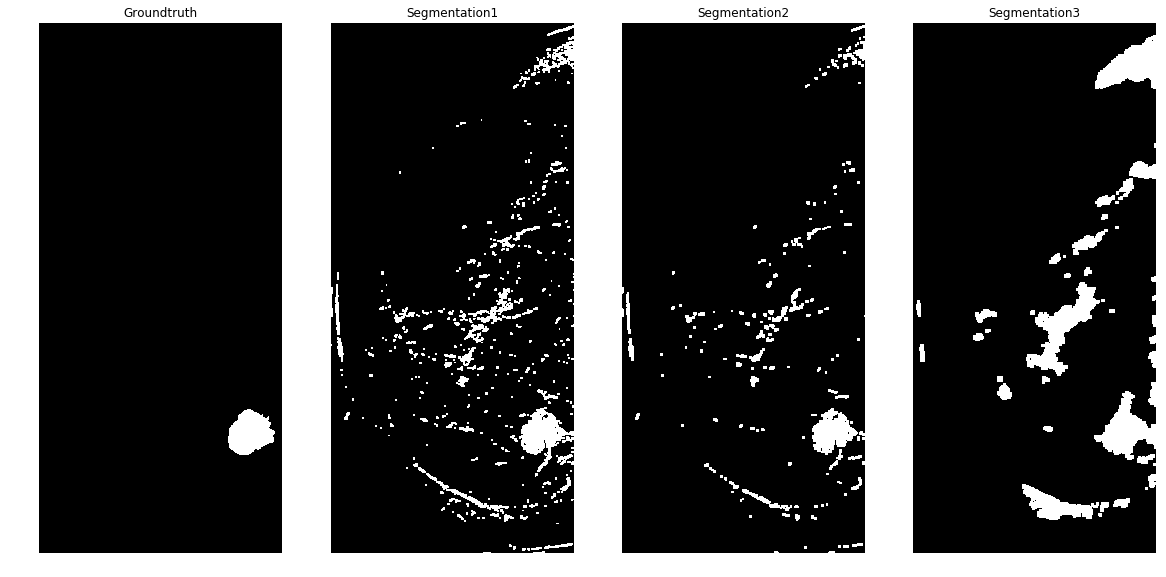

(3166, 1840)
(3166, 1840)
0.8494004901102749
(3166, 1840)
0.8127791889287904
(3166, 1840)
0.018147199030538217


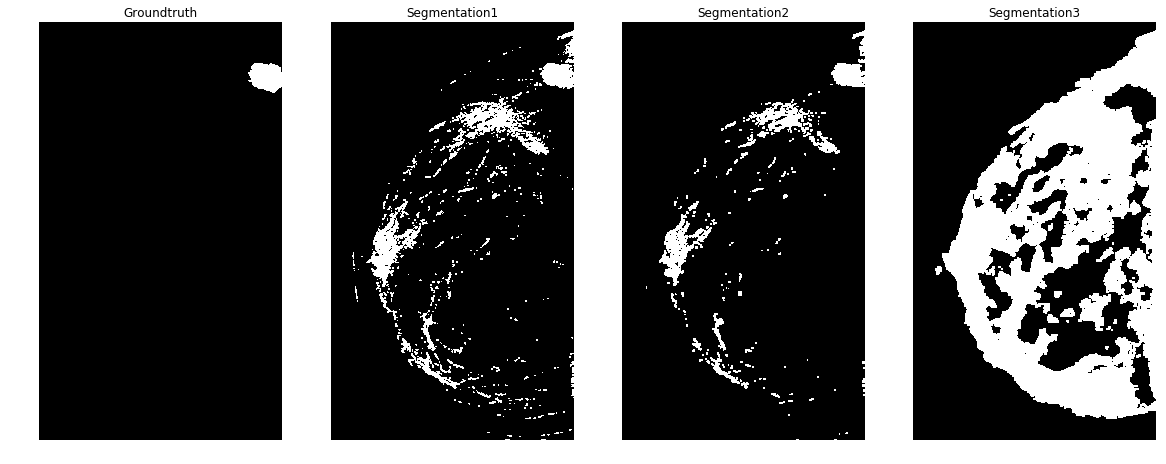

(4072, 1380)
(4072, 1380)
0.4820954373541482
(4072, 1380)
0.25892497380933194
(4072, 1380)
0.7850120870265914


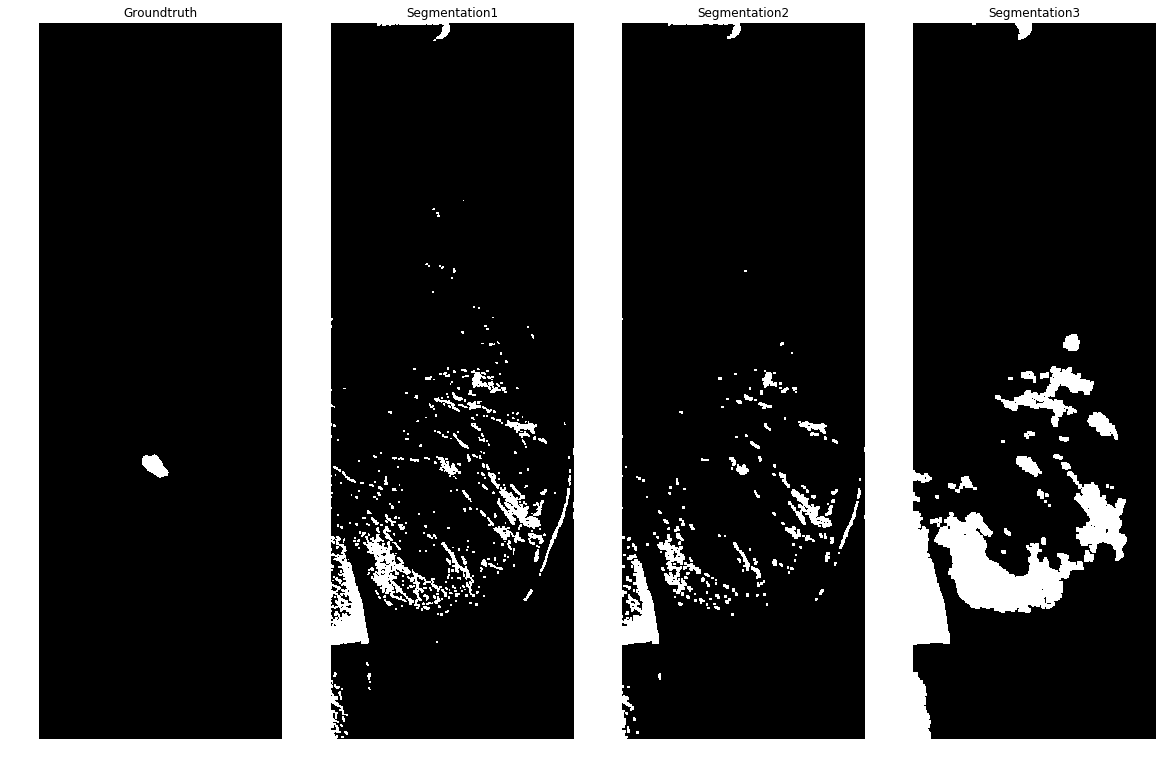

(3693, 1577)
(3693, 1577)
0.6586354535653781
(3693, 1577)
0.6941234441234442
(3693, 1577)
0.10930664874772804


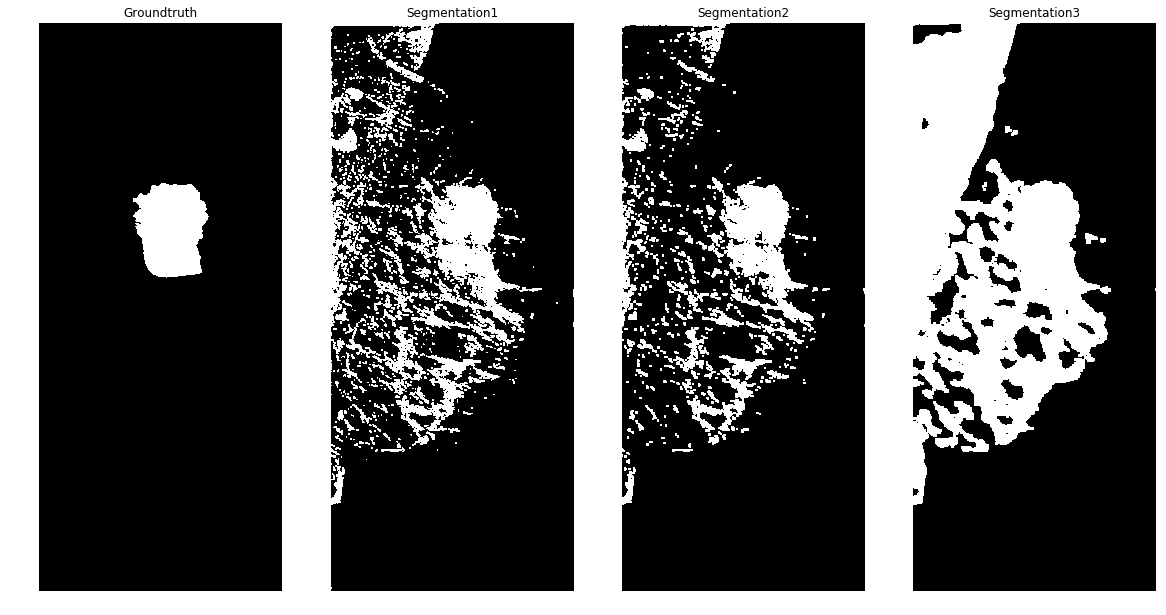

(2926, 1340)
(2926, 1340)
0.6867562038601797
(2926, 1340)
0.7135988734661034
(2926, 1340)
0.16891812963086578


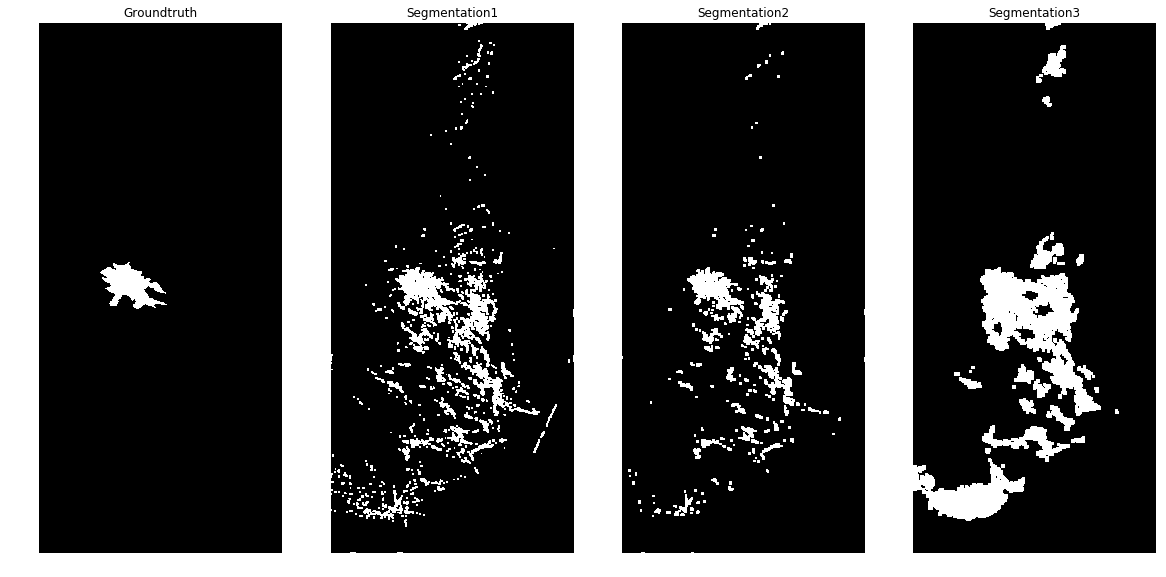

(4072, 1880)
(4072, 1880)
0.6246683070391277
(4072, 1880)
0.5622676131150708
(4072, 1880)
0.773595343467385


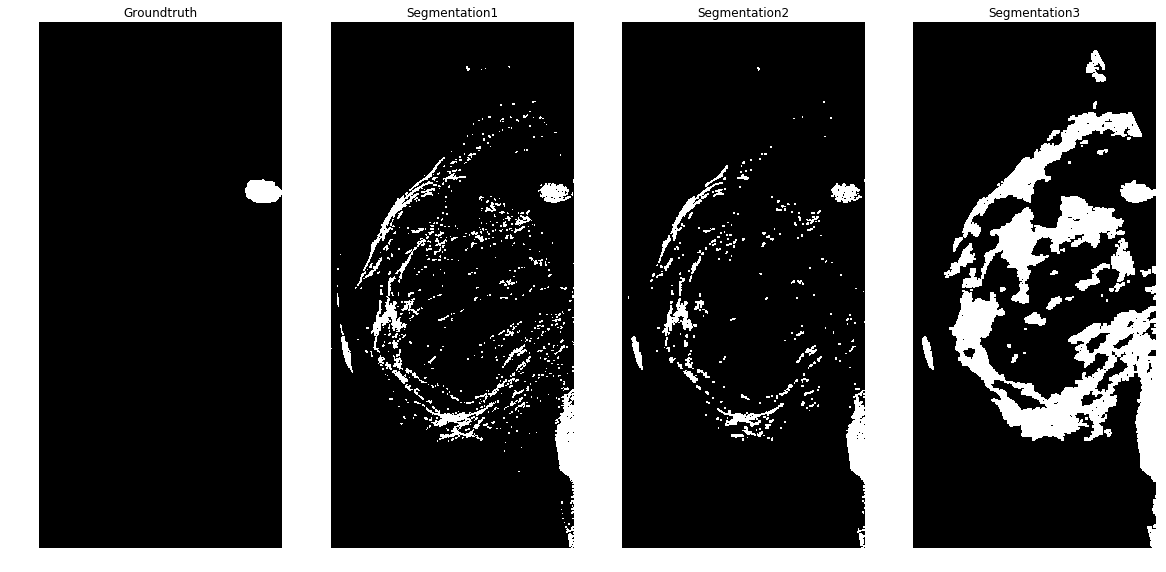

(2998, 1440)
(2998, 1440)
0.36685899117055687
(2998, 1440)
0.4793450590141171
(2998, 1440)
0.03218506312386996


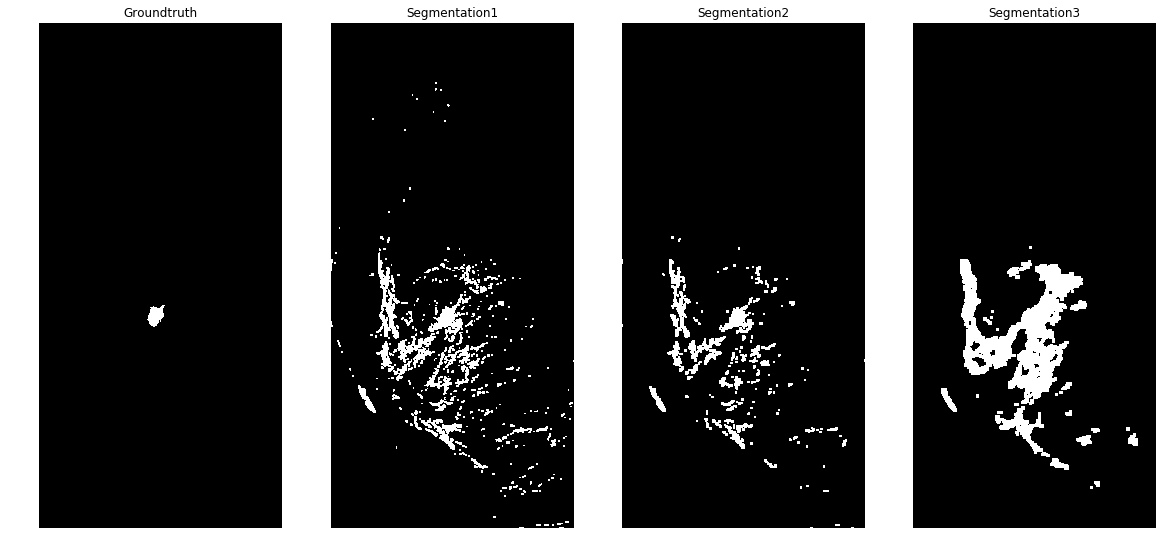

(3158, 1684)
(3158, 1684)
0.6878343218489584
(3158, 1684)
0.6667190301374541
(3158, 1684)
0.34236907163286157


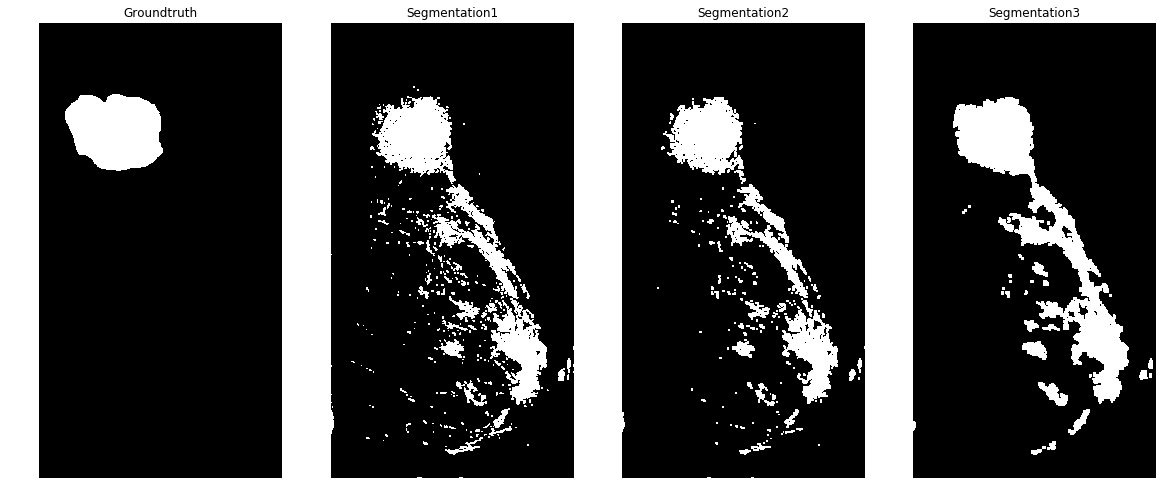

(2426, 1034)
(2426, 1034)
0.7729822026663165
(2426, 1034)
0.7123247894834095
(2426, 1034)
0.04941798069271684


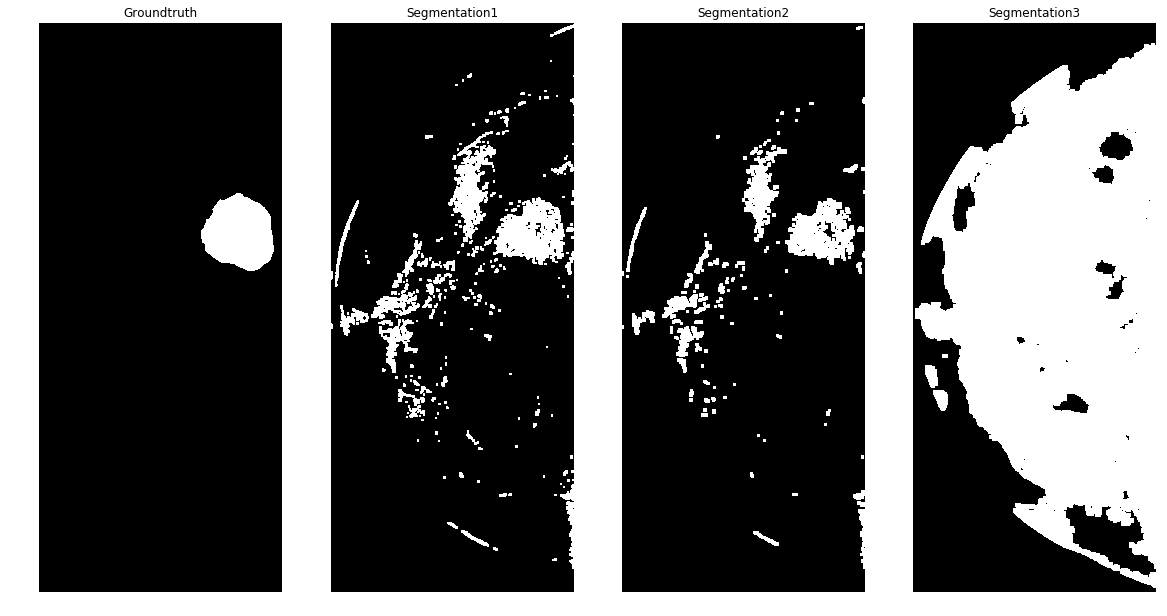

(3119, 1423)
(3119, 1423)
0.9023423581113604
(3119, 1423)
0.9039358481302676
(3119, 1423)
0.8606883375141345


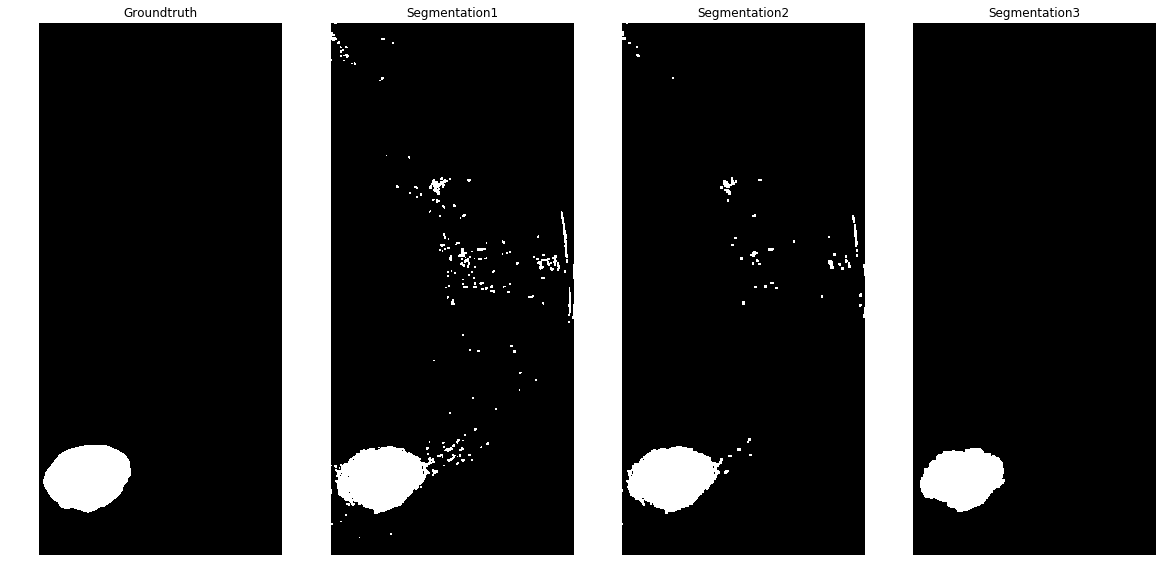

(2897, 1302)
(2897, 1302)
0.34827807290712587
(2897, 1302)
0.7067113432541637
(2897, 1302)
0.21948083919144395


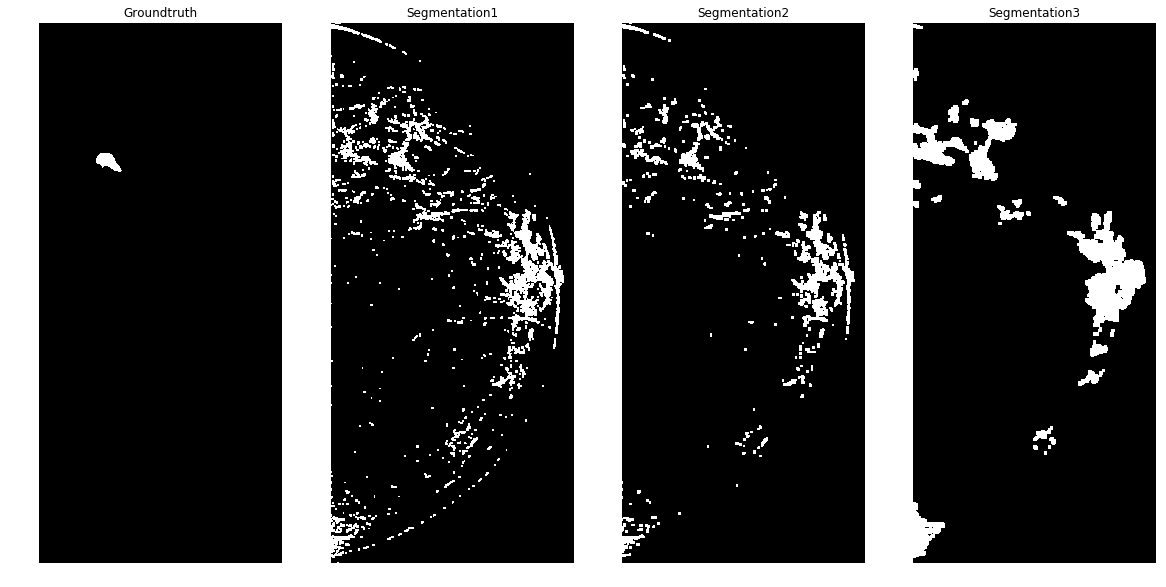

(3580, 1826)
(3580, 1826)
0.15010368251698247
(3580, 1826)
0.5098517362465861
(3580, 1826)
0.01582190858486441


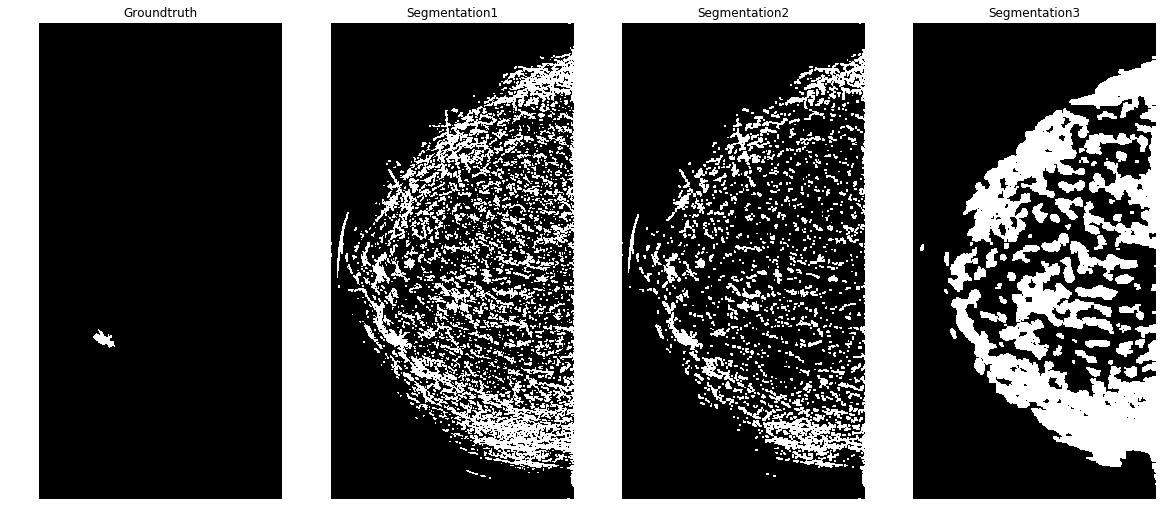

(3081, 1422)
(3081, 1422)
0.23168039193566584
(3081, 1422)
0.2836467168871226
(3081, 1422)
0.007821212646831251


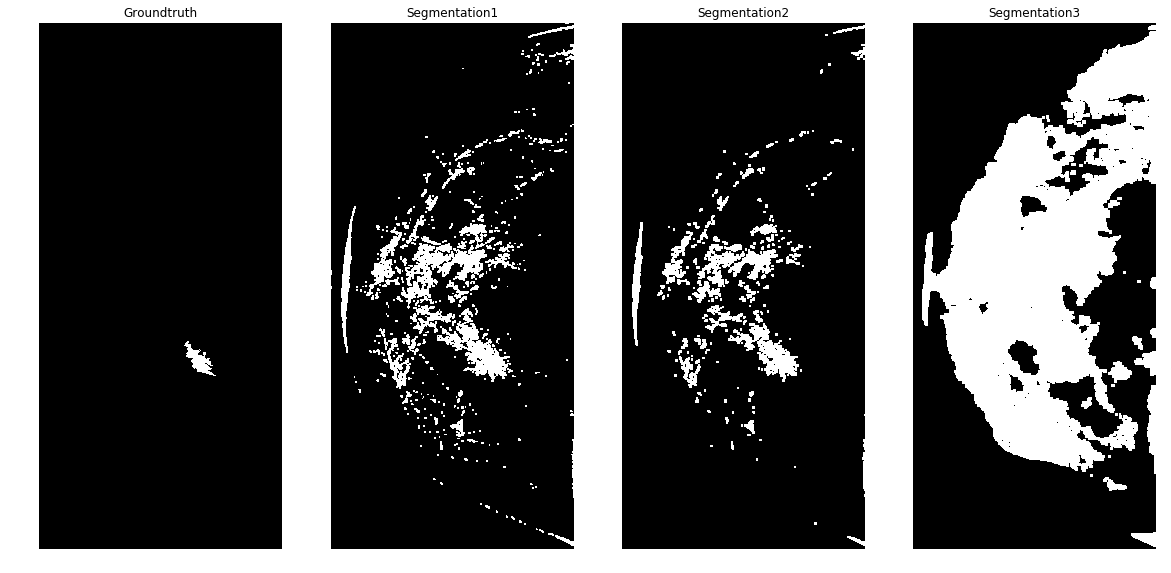

(3014, 1648)
(3014, 1648)
0.418039308361889
(3014, 1648)
0.5848088273030536
(3014, 1648)
0.6340165916446561


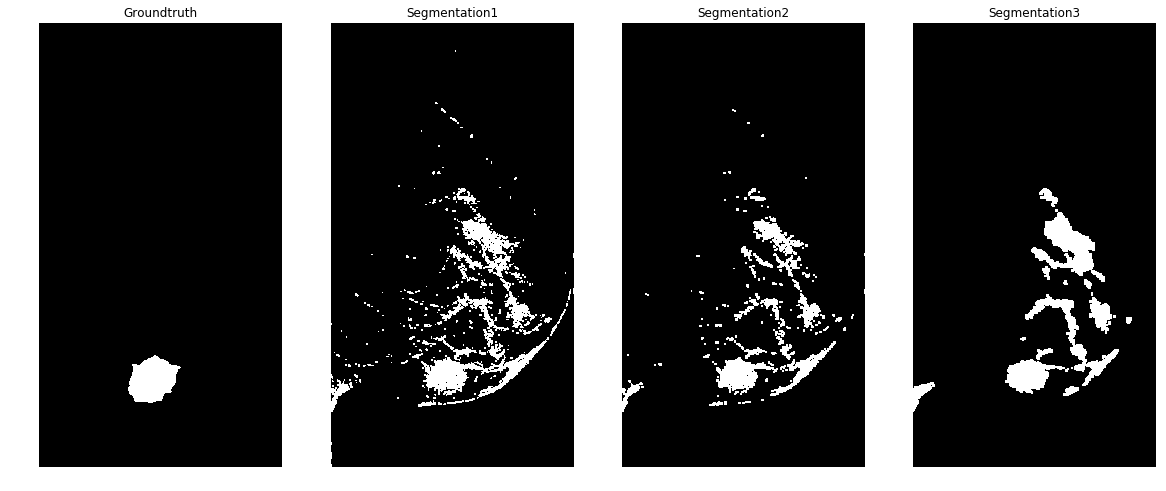

(2773, 1054)
(2773, 1054)
0.21362050801826057
(2773, 1054)
0.06018789682074831
(2773, 1054)
0.45737772412954175


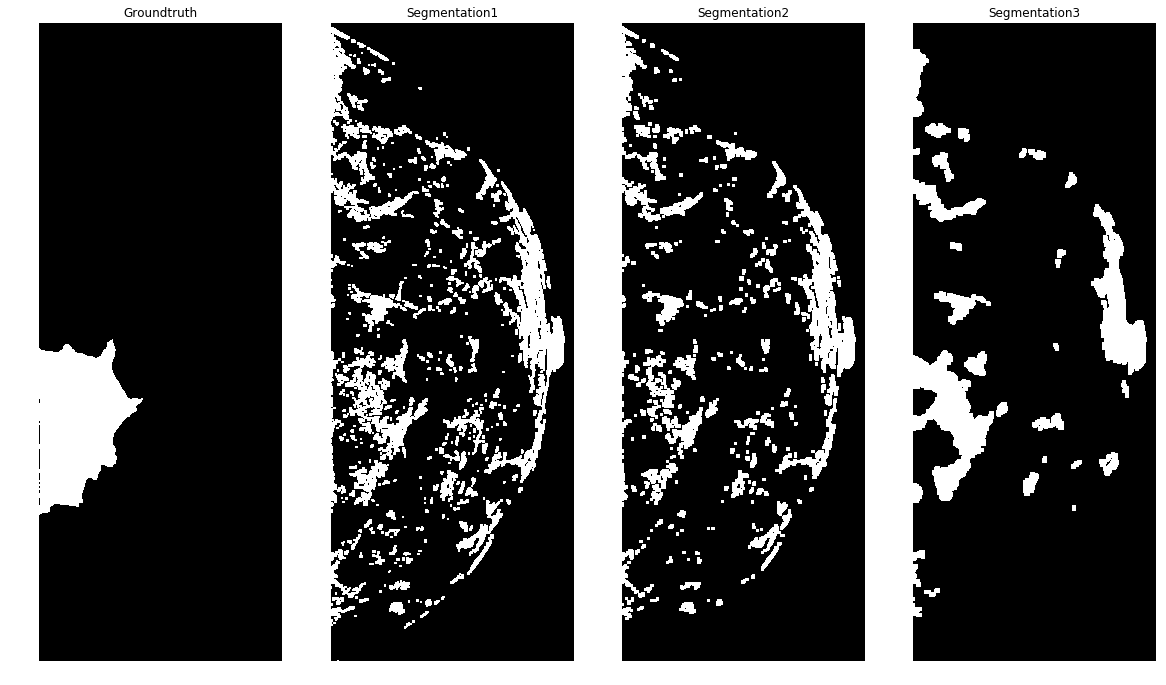

(2850, 1102)
(2850, 1102)
0.727540500736377
(2850, 1102)
0.8723549488054607
(2850, 1102)
0.0022858354920526035


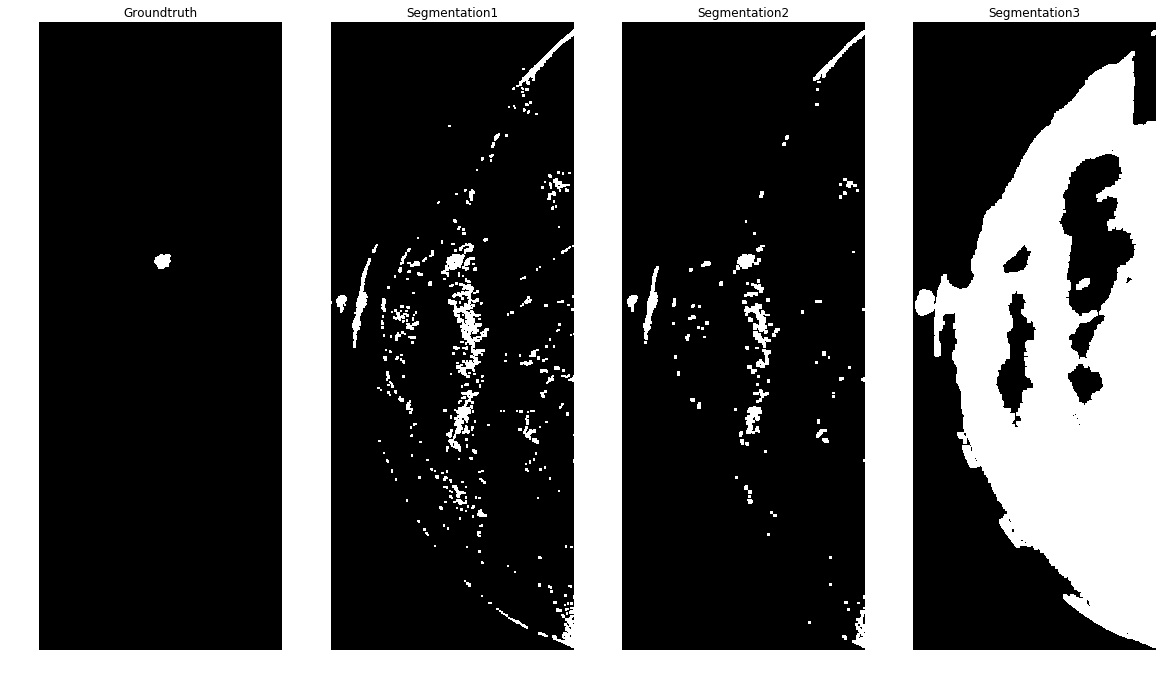

(3831, 2025)
(3831, 2025)
0.05553933395829171
(3831, 2025)
0.5167650934647859
(3831, 2025)
0.002463082233054644


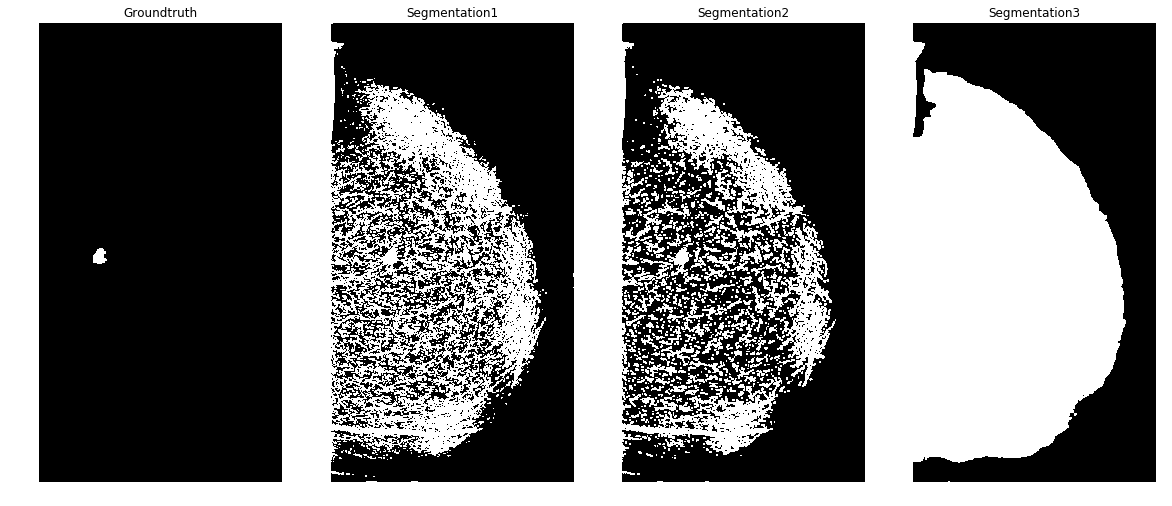

(2998, 1254)
(2998, 1254)
0.06403508771929825
(2998, 1254)
0.028679483138985187
(2998, 1254)
0.0004218673732654627


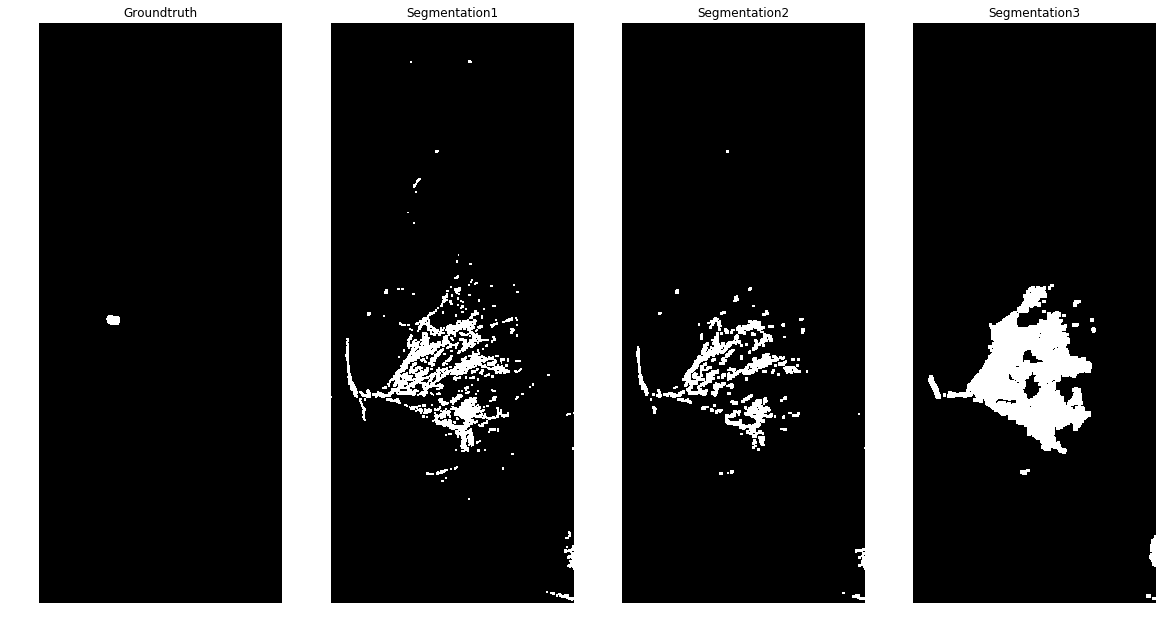

(2709, 1460)
(2709, 1460)
0.33500504571725637
(2709, 1460)
0.6108939715627614
(2709, 1460)
0.5623001475833231


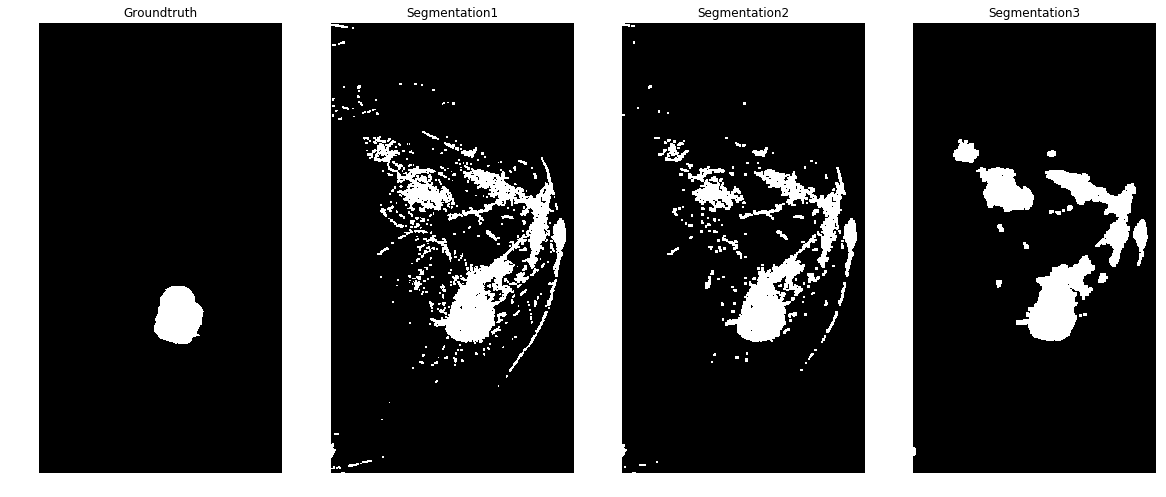

(2235, 817)
(2235, 817)
0.2493242125006896
(2235, 817)
0.12259458819349872
(2235, 817)
0.036743153219837156


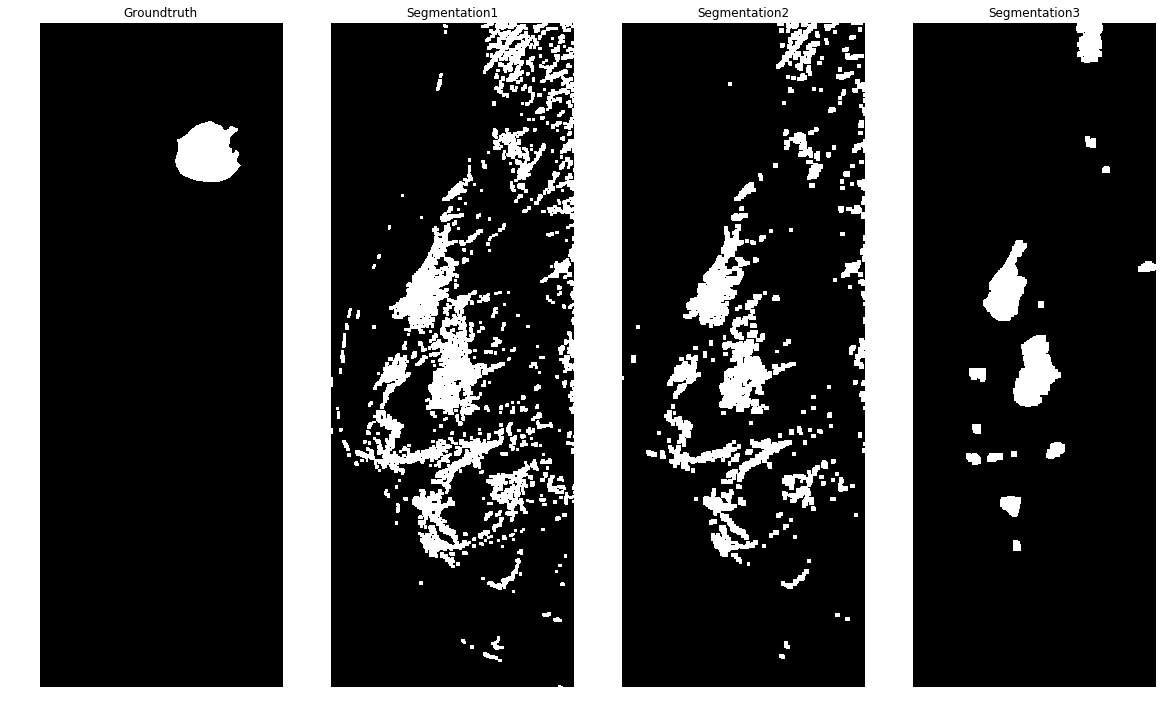

(4072, 1826)
(4072, 1826)
0.6531037425638194
(4072, 1826)
0.5905954600505555
(4072, 1826)
0.7831327053507798


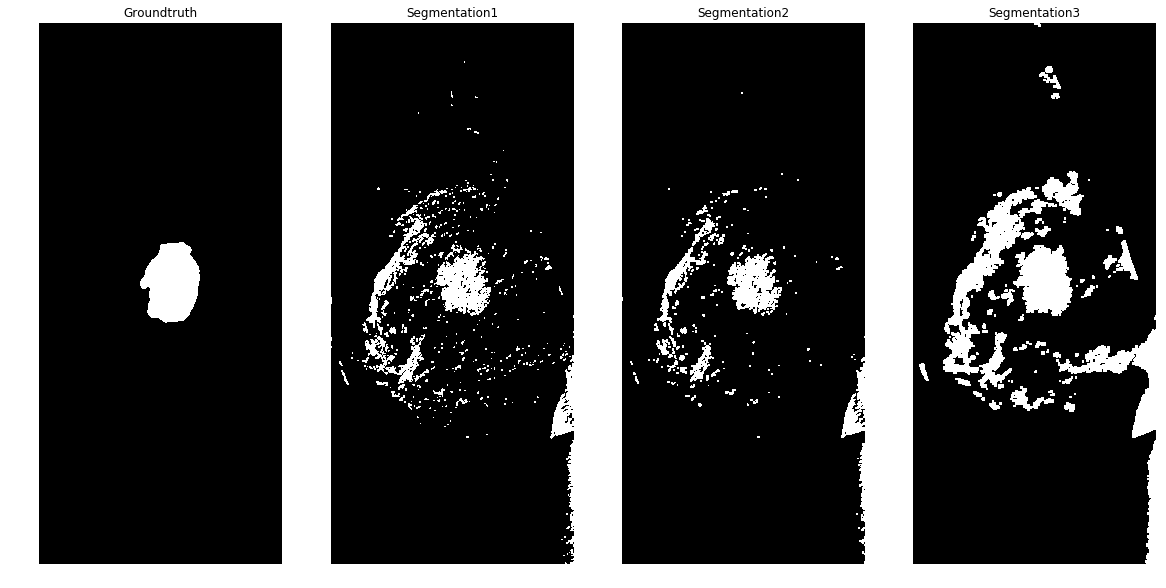

(2836, 984)
(2836, 984)
0.0
(2836, 984)
0.0
(2836, 984)
0.0


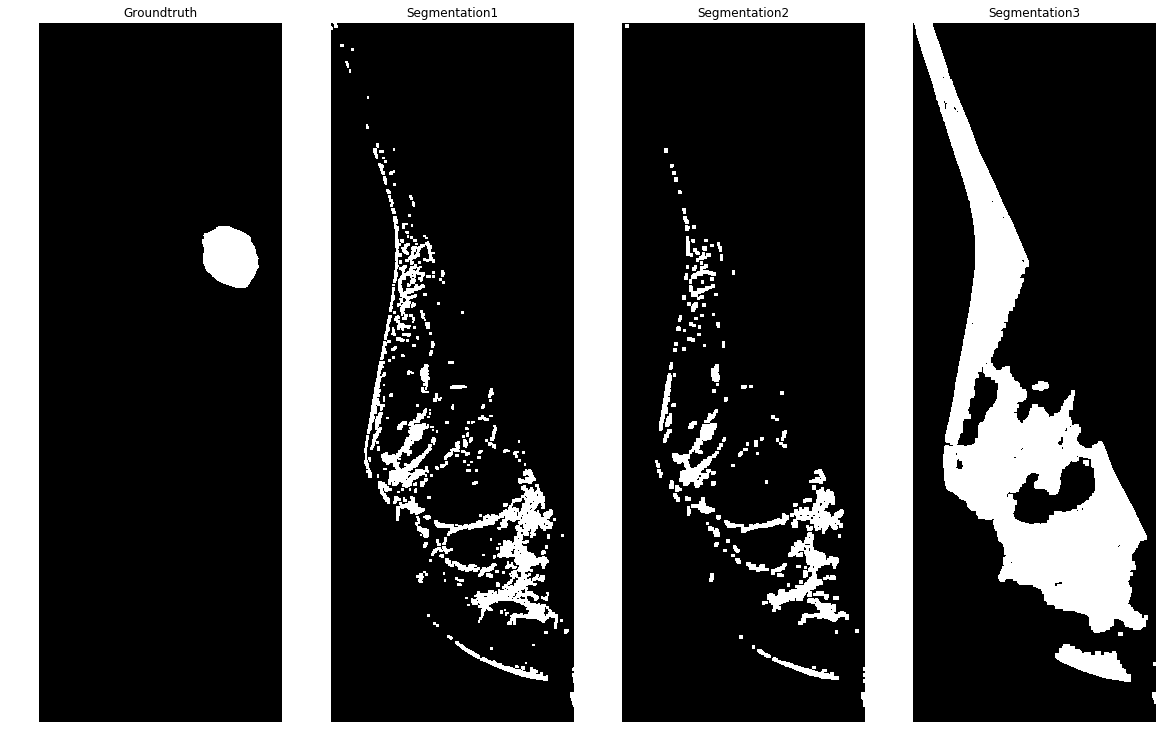

(3111, 1544)
(3111, 1544)
0.6750296001175362
(3111, 1544)
0.6493759174491223
(3111, 1544)
0.6752495374110656


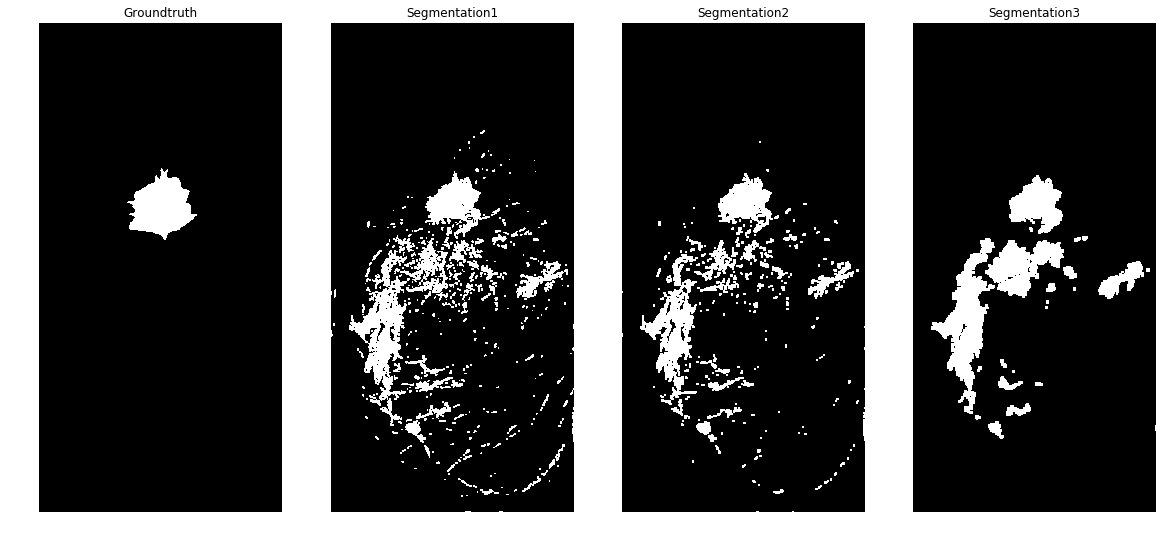

(3326, 1208)
(3326, 1208)
0.9036669339896574
(3326, 1208)
0.8685479276951079
(3326, 1208)
0.8421233193027828


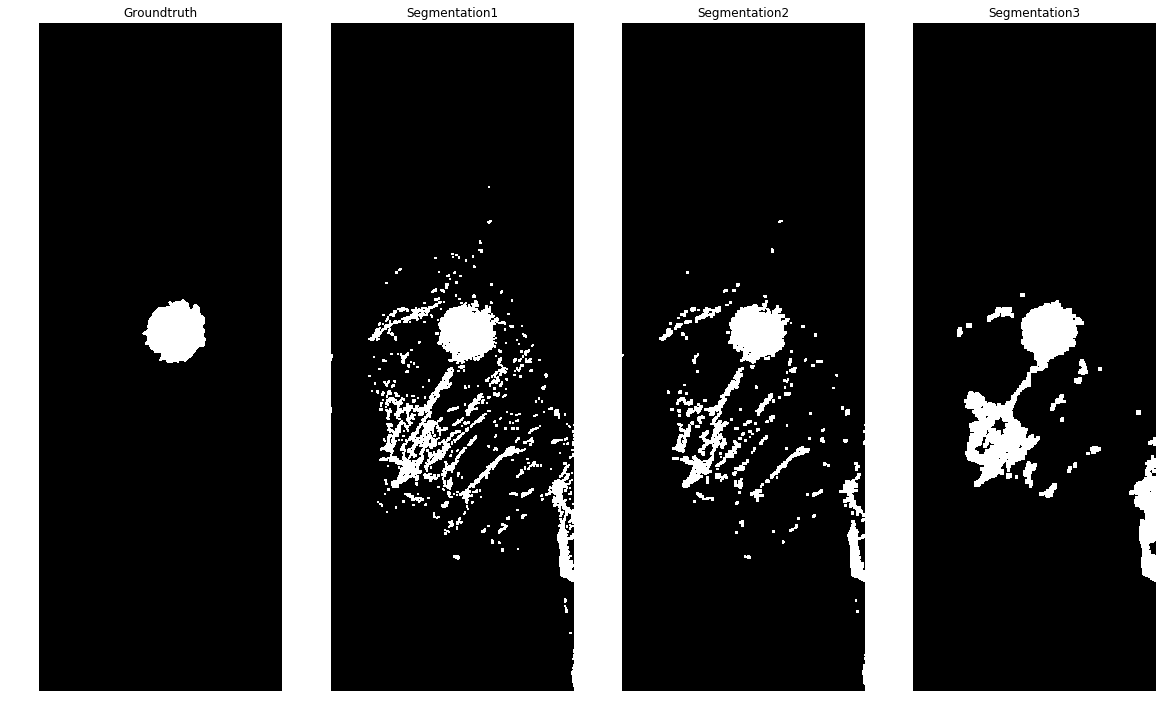

(4036, 1988)
(4036, 1988)
0.4295368255155891
(4036, 1988)
0.3604136987178461
(4036, 1988)
0.7527511602161338


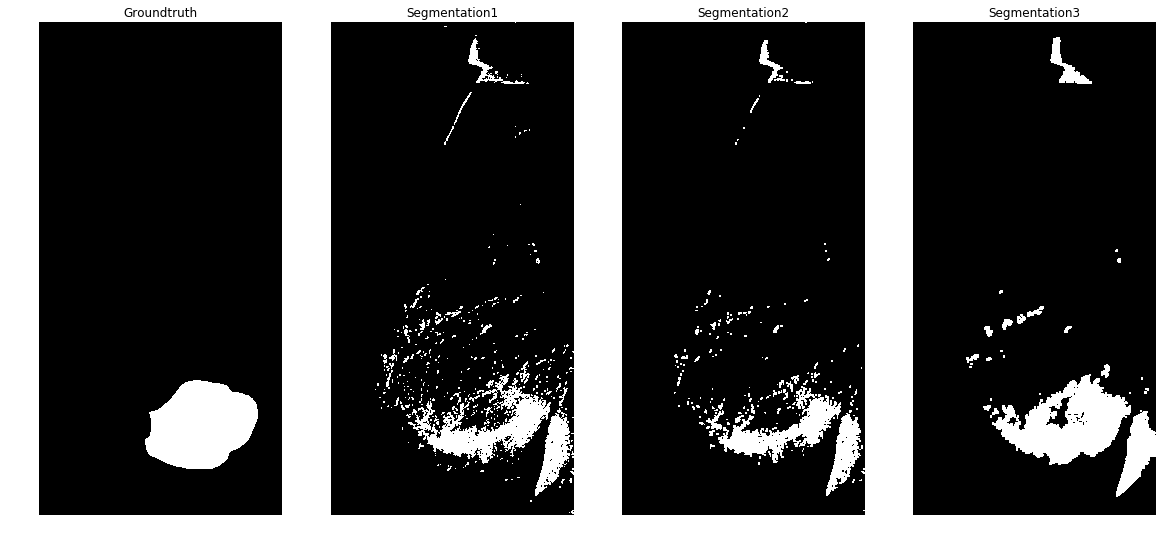

(2781, 1288)
(2781, 1288)
0.32634947323941804
(2781, 1288)
0.4725505329388182
(2781, 1288)
0.2742688602337211


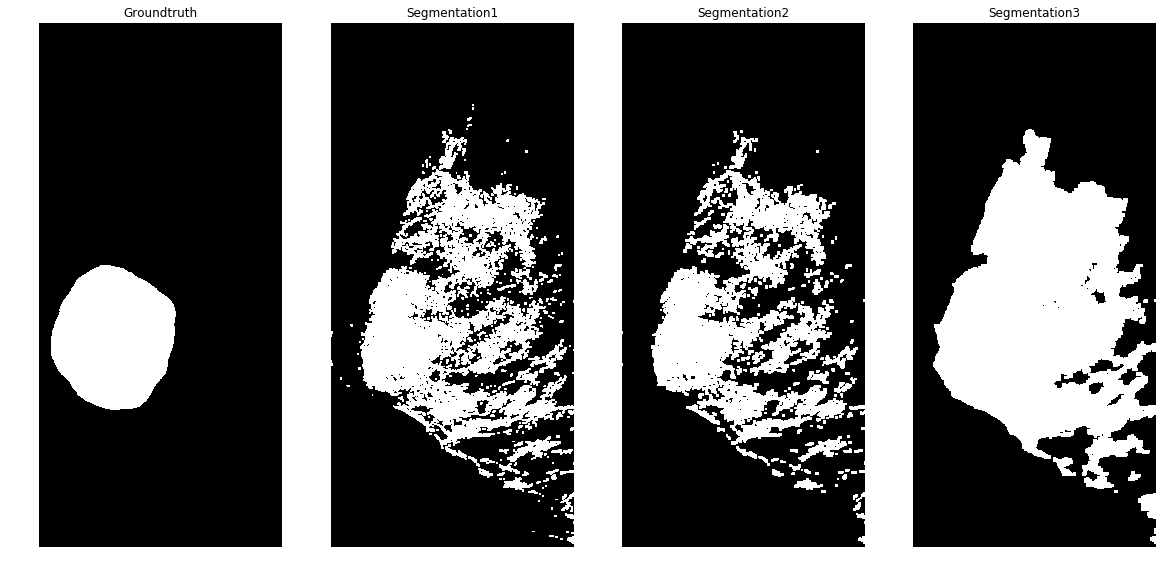

(3768, 2088)
(3768, 2088)
0.09006869818462257
(3768, 2088)
0.15170744358952193
(3768, 2088)
0.0018500646408127514


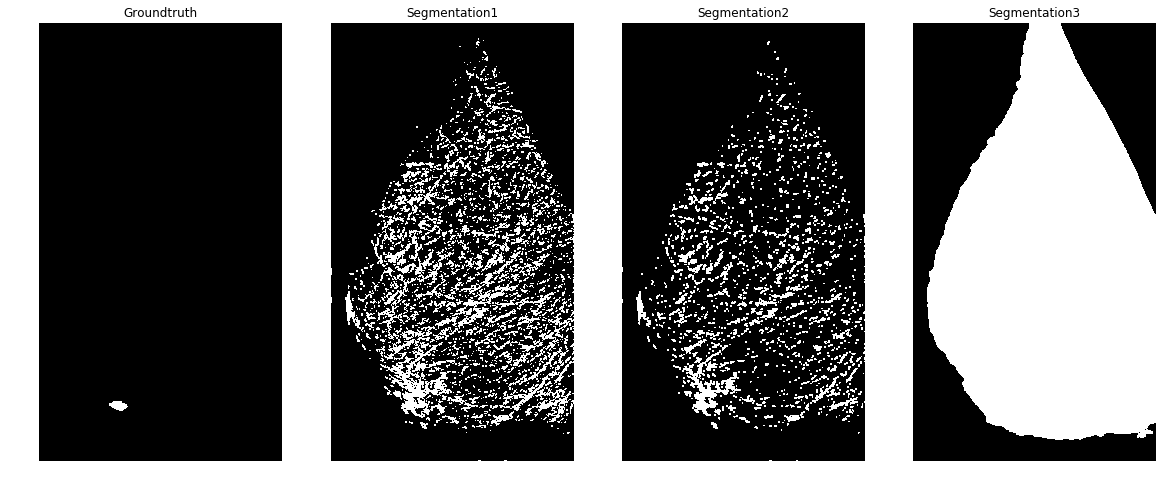

(2565, 1139)
(2565, 1139)
0.29465194225098906
(2565, 1139)
0.25045268800775017
(2565, 1139)
0.25909033279476734


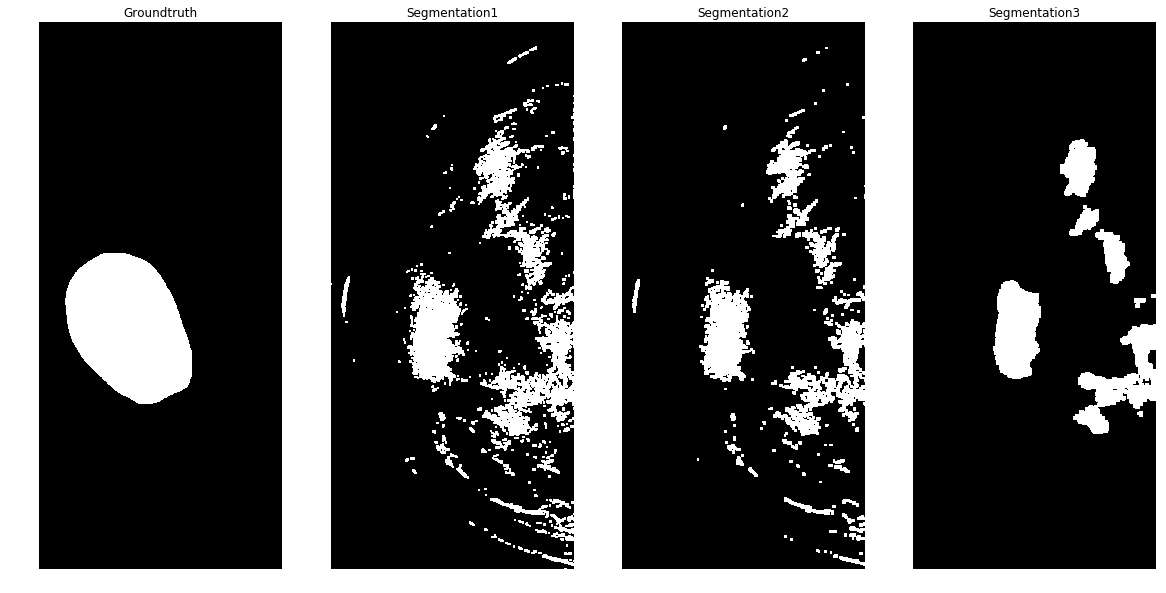

(2958, 1142)
(2958, 1142)
0.2947802633666508
(2958, 1142)
0.15030310234161418
(2958, 1142)
0.415459191738237


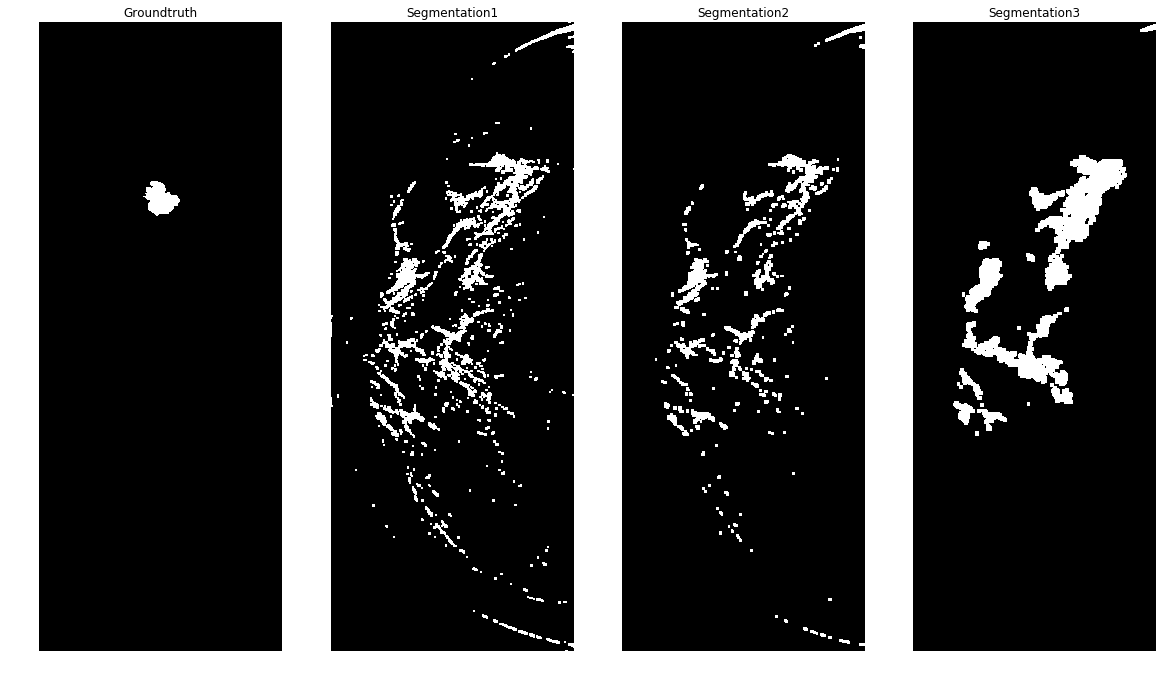

(3253, 1391)
(3253, 1391)
0.33158400367072455
(3253, 1391)
0.5751844010167819
(3253, 1391)
0.09253701803947231


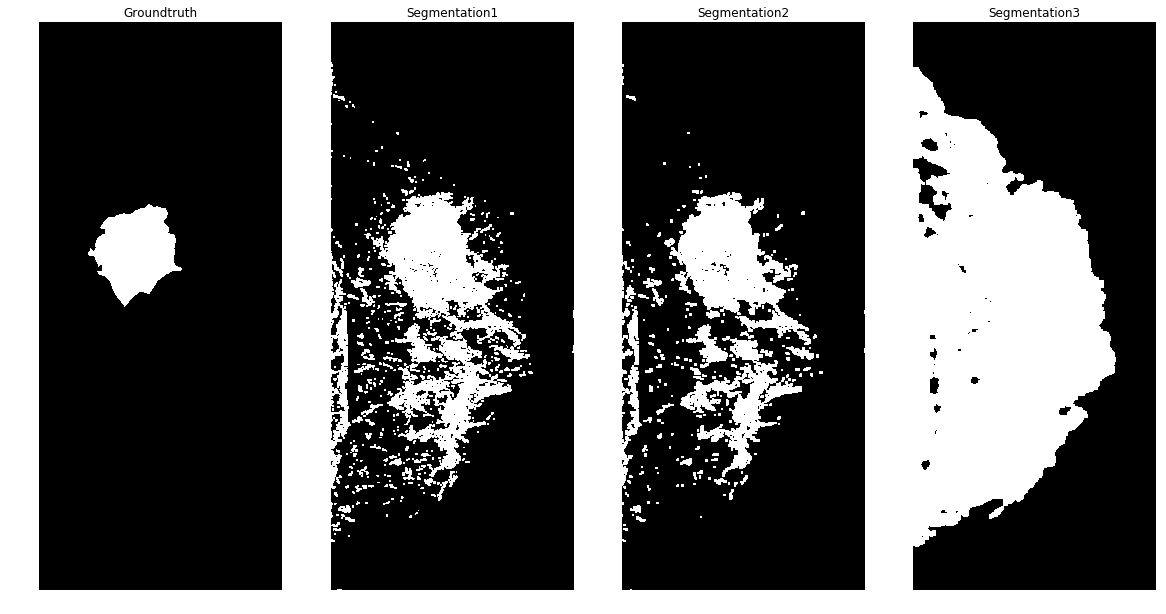

(2256, 995)
(2256, 995)
0.49326881320181154
(2256, 995)
0.43614801937166275
(2256, 995)
0.8455718632331168


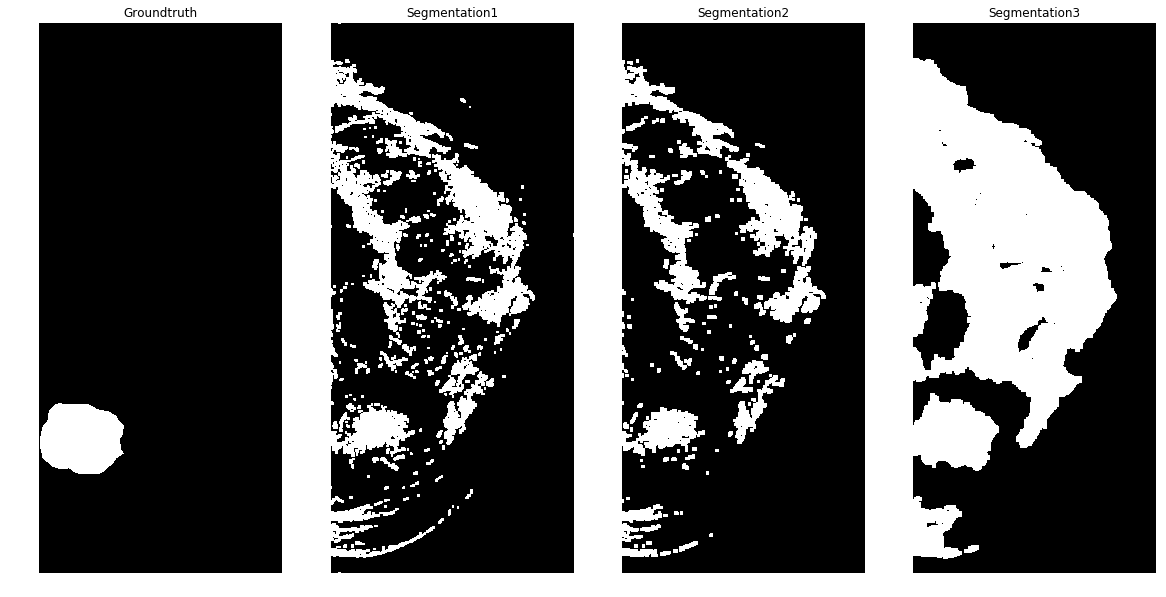

(3375, 1824)
(3375, 1824)
0.40948907070788493
(3375, 1824)
0.42065687183005934
(3375, 1824)
0.4834661913154943


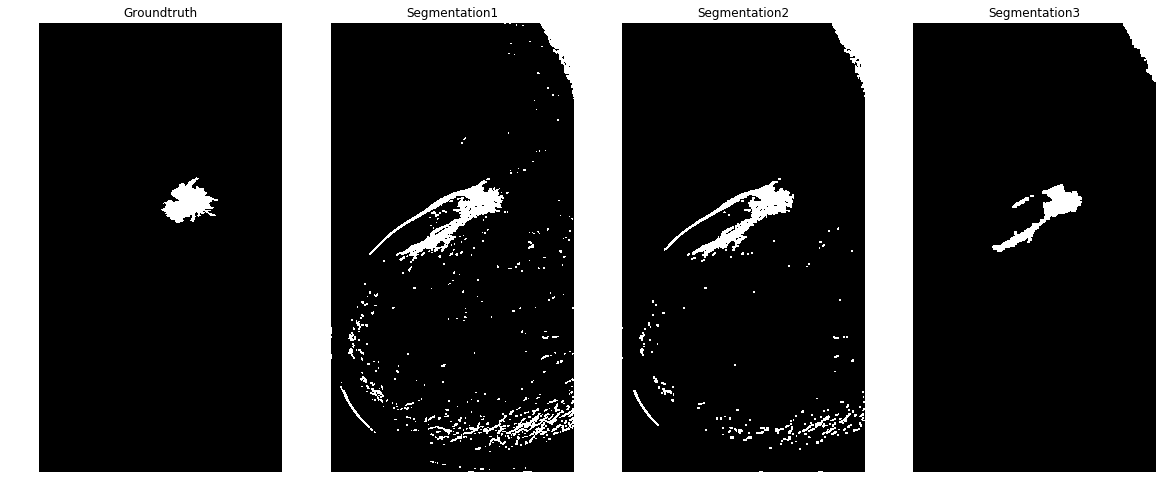

(4072, 2364)
(4072, 2364)
0.6307396994050226
(4072, 2364)
0.6146380230129945
(4072, 2364)
0.6548021802462175


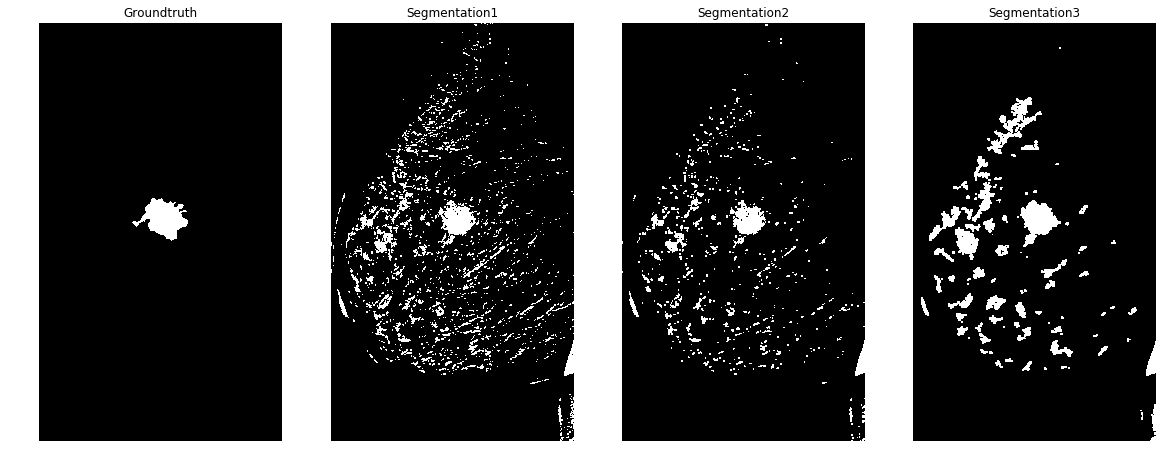

(1870, 698)
(1870, 698)
0.46828916159637
(1870, 698)
0.4048047066514136
(1870, 698)
0.1279343776120742


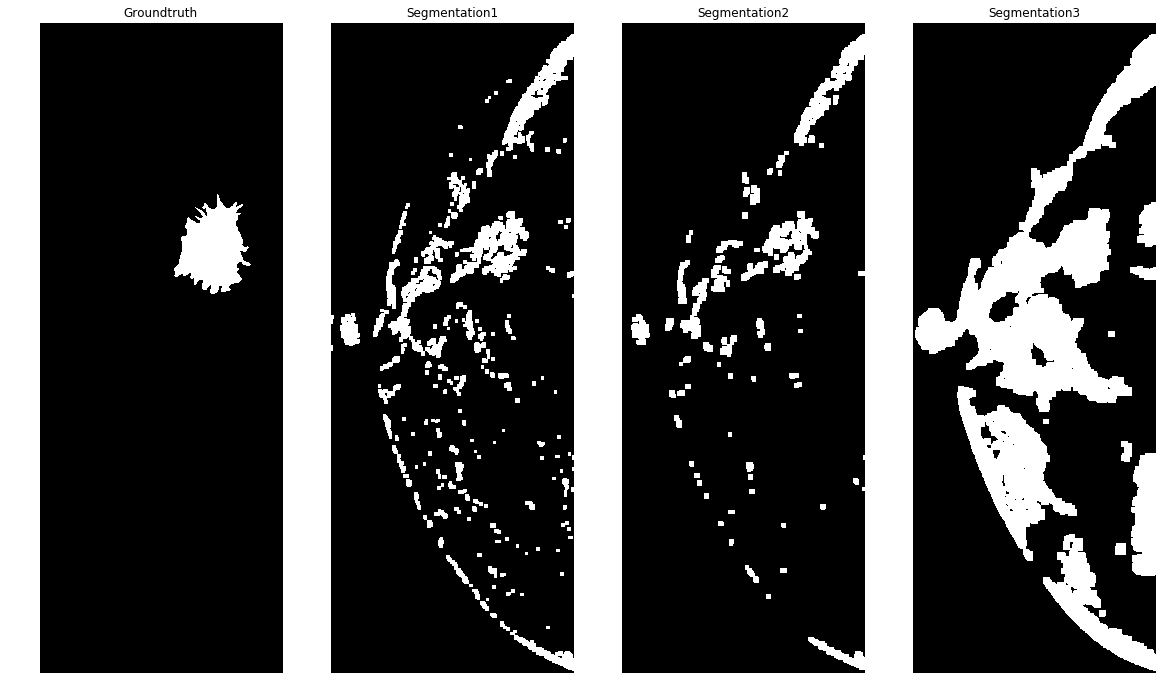

(2773, 1115)
(2773, 1115)
0.34148462679695096
(2773, 1115)
0.24182739039238757
(2773, 1115)
0.4360259886427585


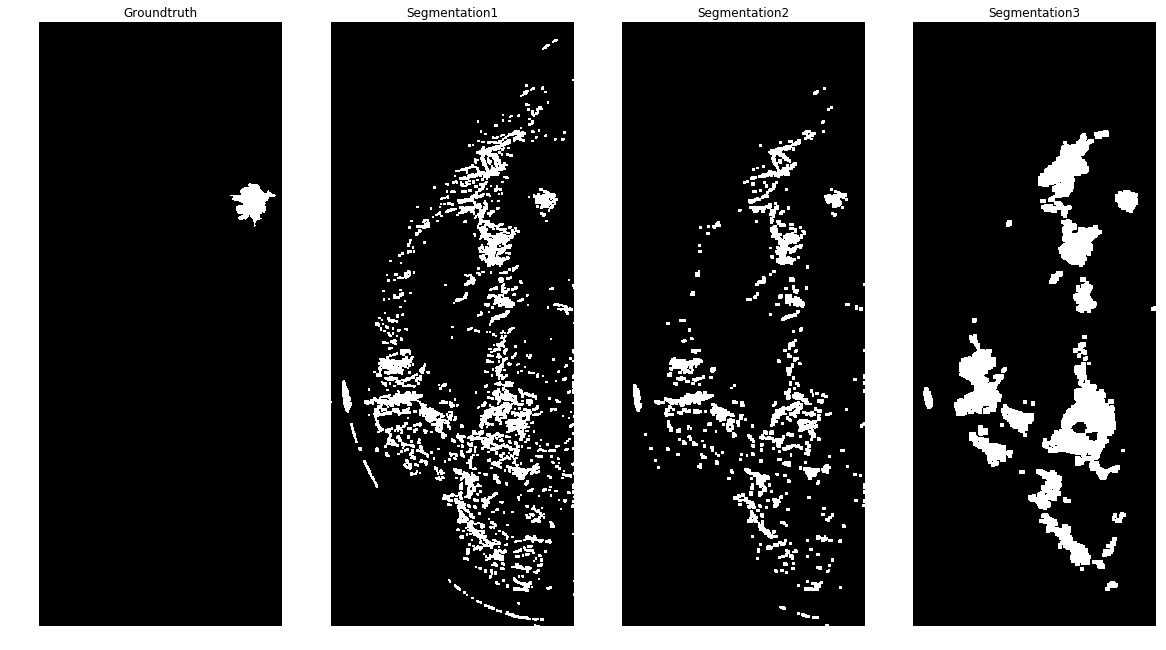

(2612, 1160)
(2612, 1160)
0.2007266480397287
(2612, 1160)
0.17726711144057328
(2612, 1160)
0.35102399699667064


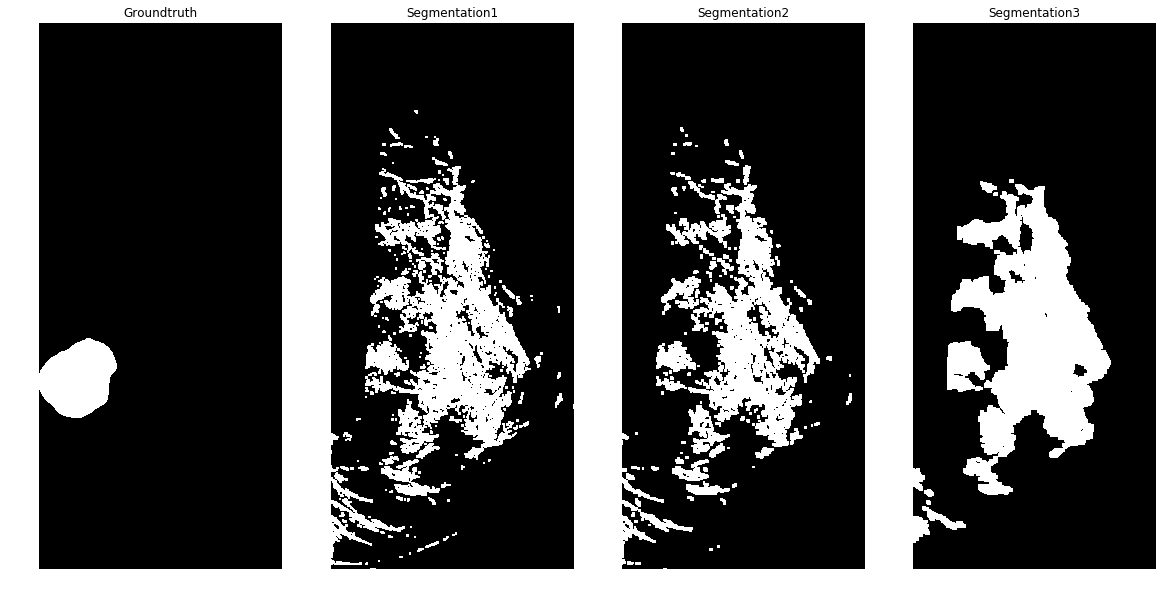

(2886, 1232)
(2886, 1232)
0.6269811845398091
(2886, 1232)
0.5975086212963615
(2886, 1232)
0.39249812100714015


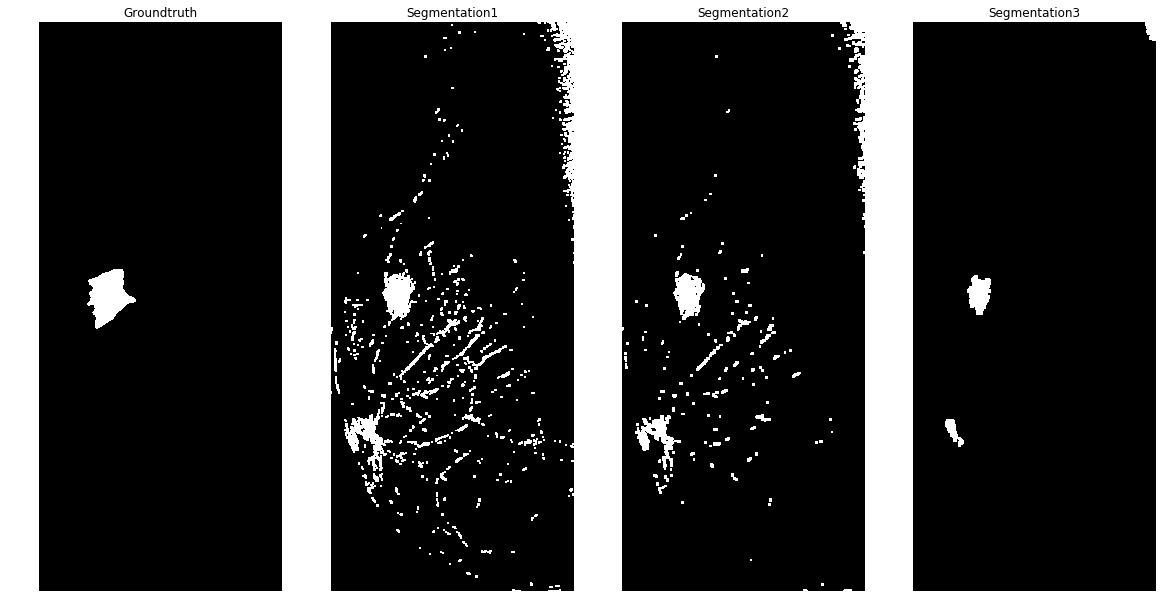

(3461, 1953)
(3461, 1953)
0.23308440823715773
(3461, 1953)
0.15362779607130692
(3461, 1953)
0.0


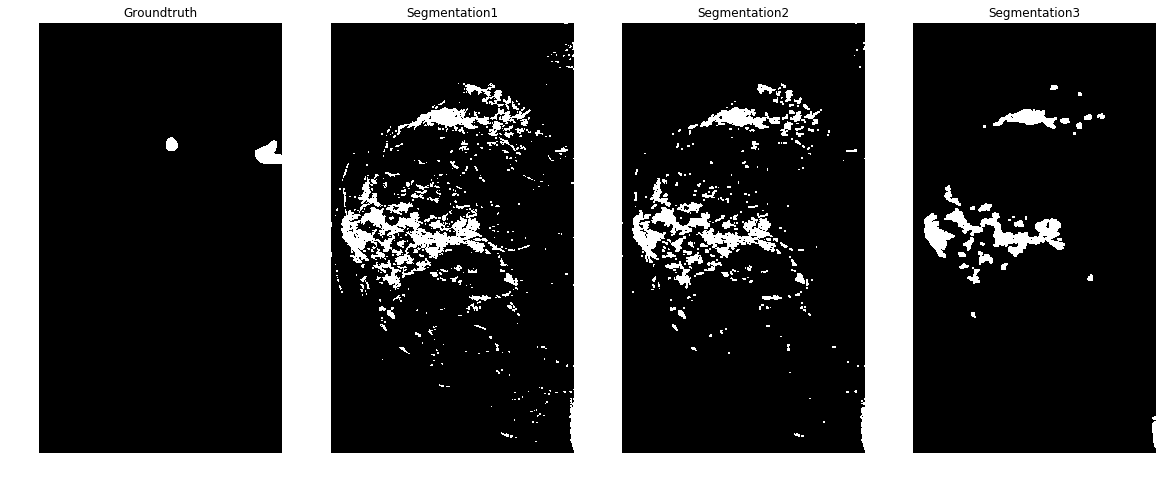

(3326, 1460)
(3326, 1460)
0.6813805125922628
(3326, 1460)
0.619615676407602
(3326, 1460)
0.7194823729257739


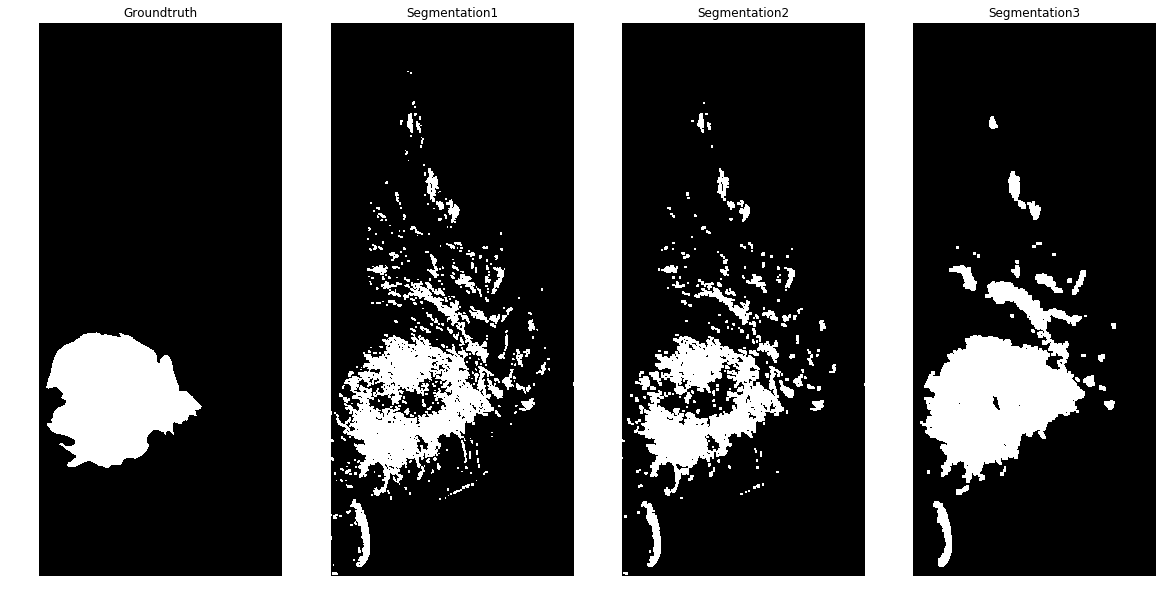

(3280, 2077)
(3280, 2077)
0.774814712197825
(3280, 2077)
0.648688080405734
(3280, 2077)
0.8411574537838084


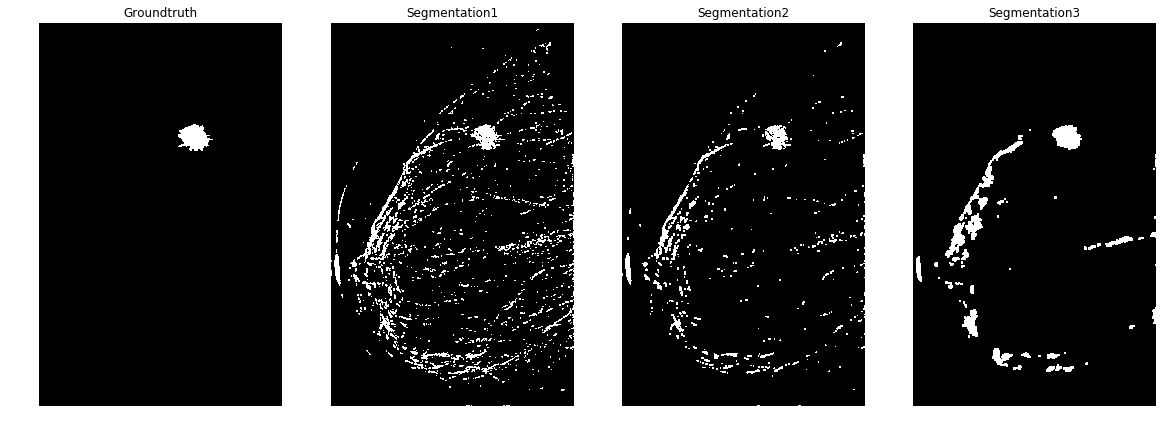

(3432, 1789)
(3432, 1789)
0.8357117777864471
(3432, 1789)
0.8375209789640058
(3432, 1789)
0.8321505908305691


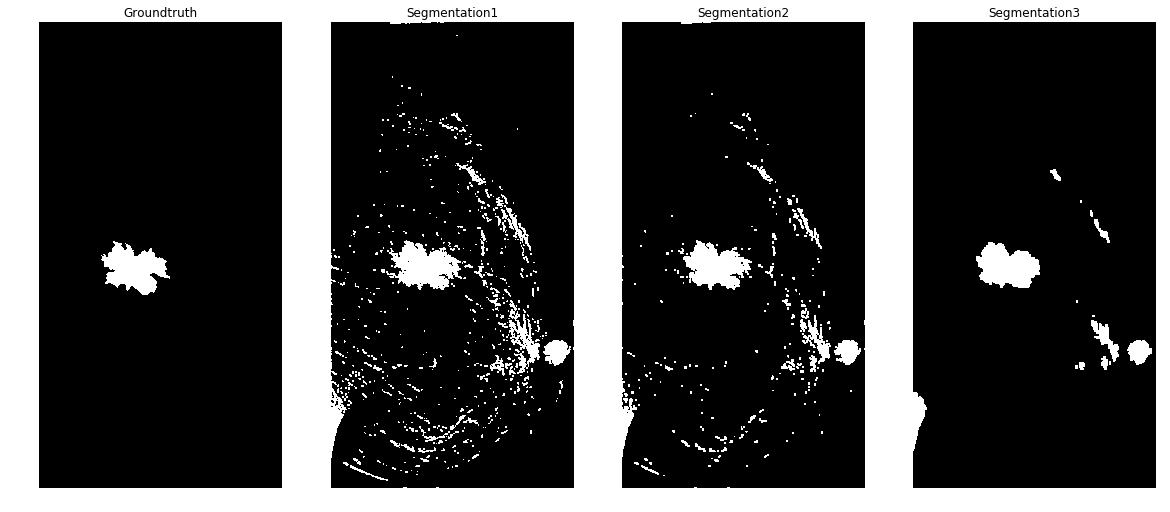

(3071, 1576)
(3071, 1576)
0.6986795534985026
(3071, 1576)
0.6975495071887151
(3071, 1576)
0.7315560276155072


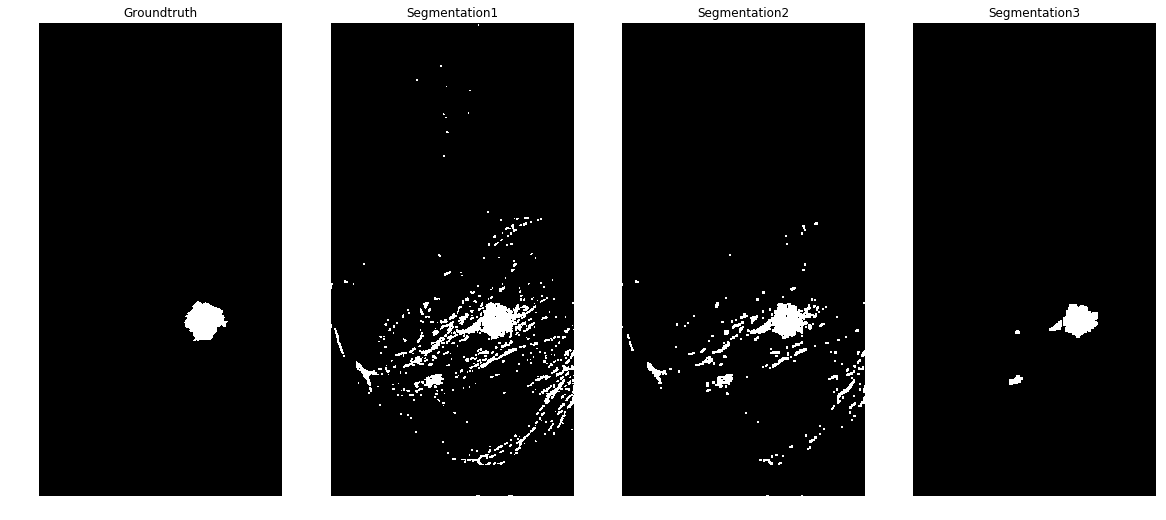

(2603, 1494)
(2603, 1494)
0.648097303122835
(2603, 1494)
0.5615704530284619
(2603, 1494)
0.6934189131364998


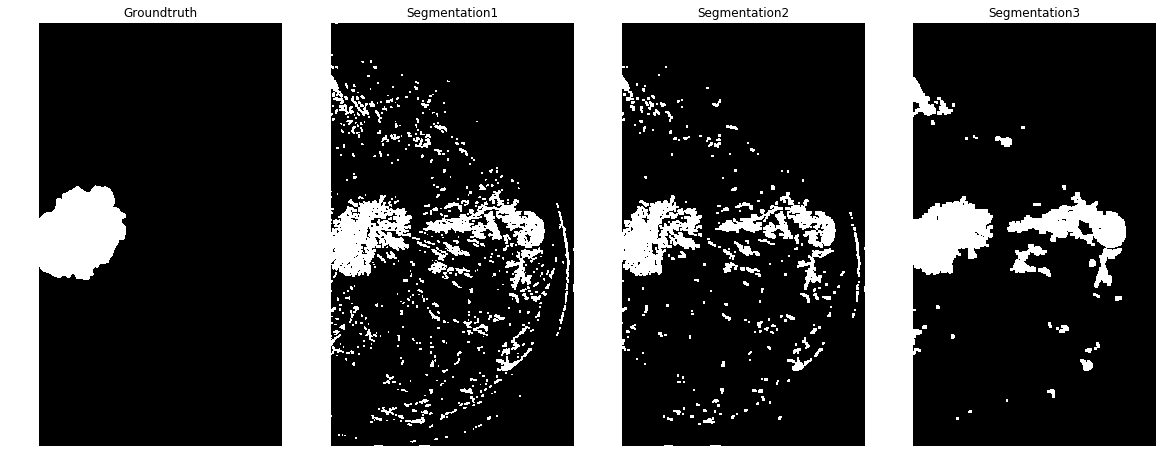

KeyboardInterrupt: 

In [3]:
Plot_Result(img, 20, 10, (10,10), (13,13), (17,17), 30, 30)

Jaccard Index to Verify Results

In [ ]:
print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

av_jaccard = 0
av_jaccard2 = 0
img = data_set["train"]
count = 0
for m in img:
    m.read_data()
   
    m.image_data = testPreProcessing(m.image_data)
    
    #Best parameters should be made default ... for segmentations
    Seg, SegA = Segmentation(m.image_data)
    SegB = Segmentation2(m.image_data)
    print("Oi")
    if (SegA.shape == (m.cropped_ground_truth).shape):
        count += 1
        av_jaccard = av_jaccard + segmentation.jaccard_index(SegA,  m.cropped_ground_truth)
        print(segmentation.jaccard_index(SegA,  m.cropped_ground_truth))
        av_jaccard2 = av_jaccard2 + segmentation.jaccard_index(SegB,  m.cropped_ground_truth)
        print(segmentation.jaccard_index(SegB,  m.cropped_ground_truth))
        
print("Average jaccard index for training set (Segmentaion1)is {}".format(av_jaccard/count))
print("Average jaccard index for training set (Segmentaion2)is {}".format(av_jaccard2/count))

In [ ]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)


img = mm.image_data


enhanced = preprocessing.clahe(img)
morpho = preprocessing.morphoEnhancement(img)
img_wavelet = preprocessing.waveletTransform(morpho)

plt.figure(figsize=(20, 10))
plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(img, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Image')

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(enhanced, interpolation="nearest", cmap=plt.cm.gray)
plt.title('CLAHE')

plt.subplot(1,4,3)
plt.axis("off")
plt.imshow(morpho, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Morpho')

plt.subplot(1,4,4)
plt.axis("off")
plt.imshow(img_wavelet, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Wavelet and Morpho')
plt.show()